# Name : Dhrupad Kumar Das 

# Assignment : Income Classification

# Batch 10

## c)	Use the Income Classification dataset from below Kaggle link and create an end to end project on Jupyter/Colab.

## https://www.kaggle.com/datasets/lodetomasi1995/income-classification/data

### i.	Download the dataset from above link and load it into your Python environment.
### ii.	Perform the EDA and do the visualizations.
### iii.	Check the distributions/skewness in the variables and do the transformations if required.
### iv.	Check/Treat the outliers and do the feature scaling if required.
### v.	Create a ML model to predict the life expectancy based on the specifications given.
### vi.	Check for overfitting and treat them accordingly.
### vii.	Use all the Supervised ML algorithms (DT, RF, SVM, XGBoost etc.) and compare the performances to get the best model.


In [423]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
%matplotlib inline
sns.set(style = "darkgrid", font_scale = 1.5)
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)

import warnings
warnings.filterwarnings("ignore")

In [424]:
from sklearn.linear_model import LogisticRegression


from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer


In [425]:
df = pd.read_csv("income_evaluation.csv")

In [426]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [427]:
df.tail(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Removing the spaces from the beginning and the end

In [428]:
df.columns = df.columns.str.strip().str.title()

# Renaming for proper understanding

In [429]:
df.rename(columns = {"Fnlwgt":"Final_weight"}, inplace = True)

In [430]:
df.head(5)

,Age,Workclass,Final_weight,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [431]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Final_weight,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education-Num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital-Gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital-Loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours-Per-Week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


Here are some key observations:

### 1. **Age**

* The average age is **38.58 years**, with a standard deviation of **13.64**.
* The youngest individual is **17**, and the oldest is **90**.
* Most individuals fall in the **28 to 48** age range (25th to 75th percentile).

### 2. **Final Weight**

* This appears to be a sampling weight (commonly used in census-like data).
* The mean is **189,778**, with a high standard deviation of **105,550**, indicating significant variability.
* The weights range from **12,285** to **1,484,705**, showing some extreme values.

### 3. **Education-Num**

* The average education level (on a numerical scale) is **10.08**, with a standard deviation of **2.57**.
* It ranges from **1** (likely no education) to **16** (possibly a doctoral level).
* The majority of individuals have an education level between **9 and 12**, suggesting high school to some college education.

### 4. **Capital Gain**

* The mean capital gain is **\$1,077**, but the standard deviation is **\$7,385**, indicating skewness due to outliers.
* Most individuals have **zero capital gain** (25th, 50th, and 75th percentiles are all 0), but the maximum value is a significant **\$99,999**, which suggests a small number of very high earners.

### 5. **Capital Loss**

* Similar to capital gain, the mean is **\$87**, but the standard deviation is **\$402**, with most values at **zero**.
* The maximum loss recorded is **\$4,356**, again indicating a skewed distribution due to a few large losses.

### 6. **Hours Per Week**

* The average work week is **40.44 hours**, with a standard deviation of **12.35**.
* Most people work **40 to 45 hours** per week.
* Some outliers work as little as **1 hour** and as much as **99 hours** per week.

### General Insight:

* **Capital gain and loss** variables are heavily skewed with the majority having no gain or loss.
* **Education level** and **work hours** are more normally distributed.
* There is **significant variability** in final weight, possibly due to the nature of sampling.


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Final_weight    32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital-Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-Gain    32561 non-null  int64 
 11  Capital-Loss    32561 non-null  int64 
 12  Hours-Per-Week  32561 non-null  int64 
 13  Native-Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [433]:
df.duplicated().sum()

24

## Since duplicates are:

1) Very few (only 0.07%),
2) Likely not adding value
3) Can bias your model (especially in supervised learning),

### So we will remove them.

In [434]:
# Drop Duplicates
df = df.drop_duplicates()

# Confirm it's gone
print("Remaining duplicates:", df.duplicated().sum())
print("New shape:", df.shape)


Remaining duplicates: 0
New shape: (32537, 15)


In [435]:
df.isnull().sum().to_frame().rename(columns = {0: "Total No. of Missing Values"})

,Total No. of Missing Values
Age,0
Workclass,0
Final_weight,0
Education,0
Education-Num,0
Marital-Status,0
Occupation,0
Relationship,0
Race,0
Sex,0


In [436]:
# Total number of rows
total_rows = df.shape[0]

# Number of rows with at least one missing value
rows_with_missing = df.isnull().any(axis=1).sum()

print(f"Total Rows: {total_rows}")
print(f"Rows with Missing Values: {rows_with_missing}")
print(f"Percentage: {rows_with_missing / total_rows * 100:.2f}%")

Total Rows: 32537
Rows with Missing Values: 0
Percentage: 0.00%


### So there is no missing value in the data

# Checking for the Numerical & Categorical features

In [437]:
numerical_df = df.select_dtypes(include = [np.number])
numerical_df.head(5)

,Age,Final_weight,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [438]:
categorical_df = df.select_dtypes(include = ["object"])
categorical_df.head(5)

,Workclass,Education,Marital-Status,Occupation,Relationship,Race,Sex,Native-Country,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


# Correlation 

In [439]:
correlation_matrix = df.corr(numeric_only = True)

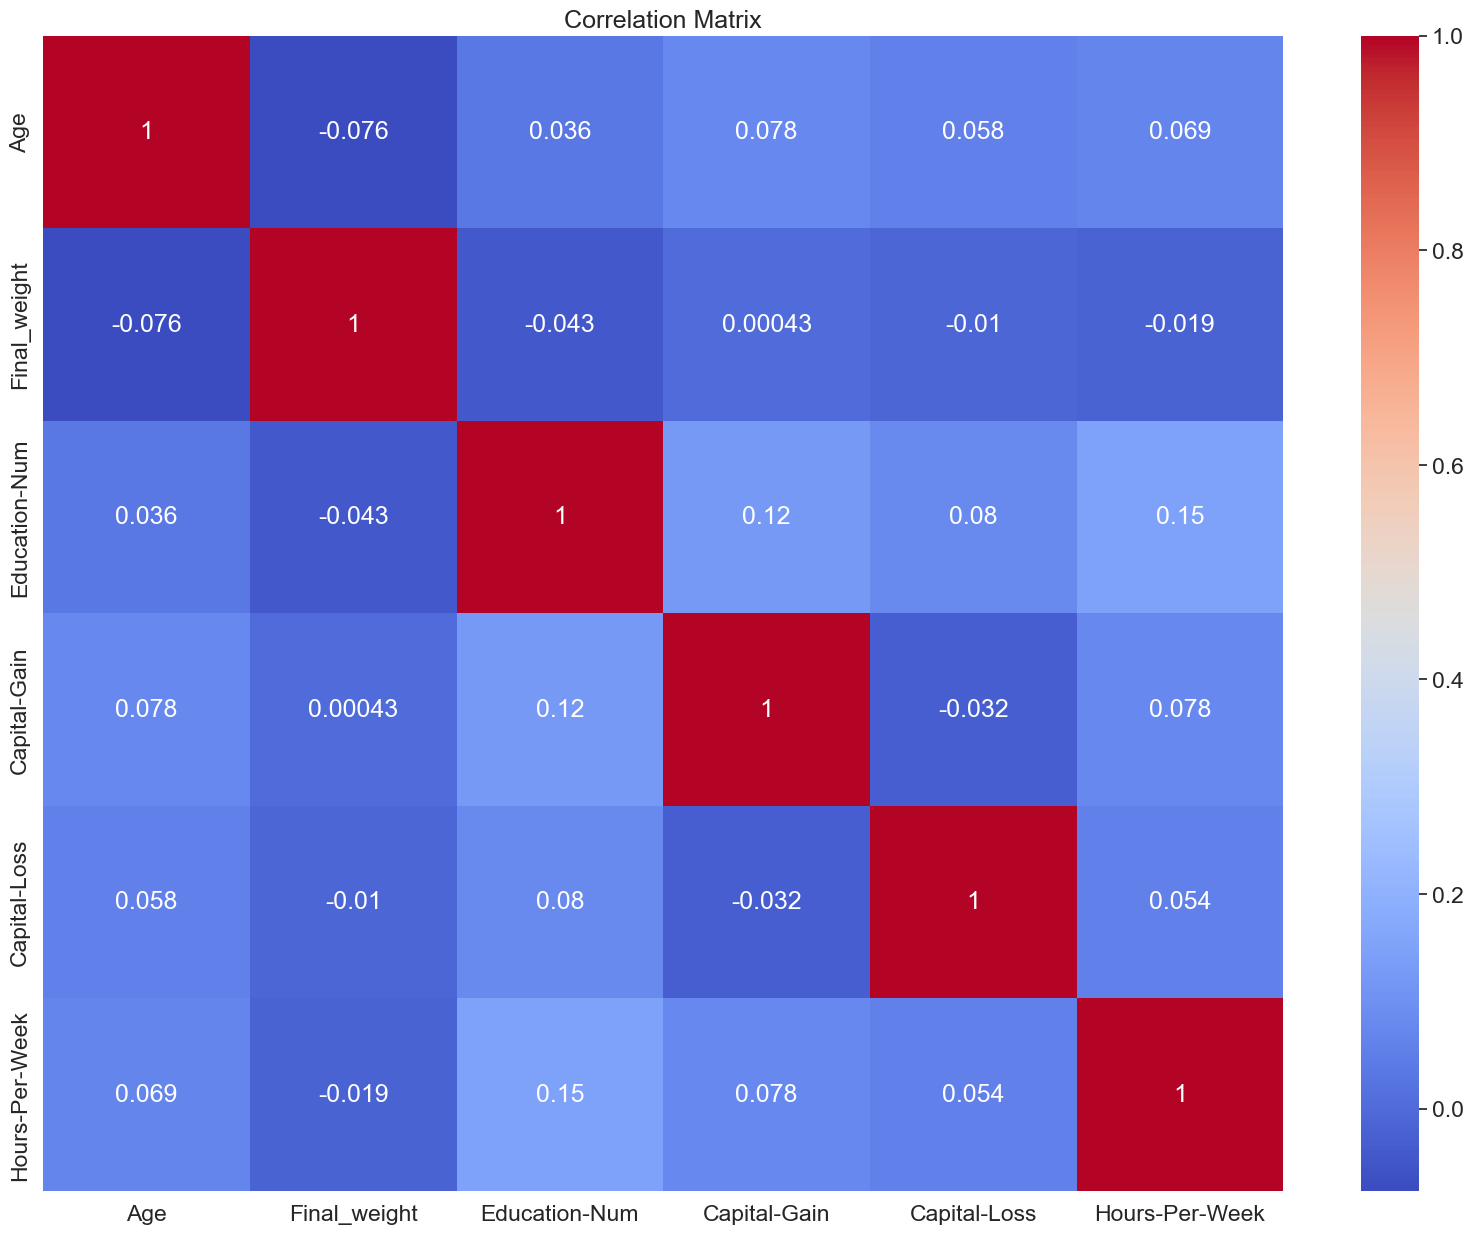

In [440]:
plt.figure(figsize = (20,15))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

# from the correlation matrix we can see that numerical features are not correlated to each other

# Visualization

# Checking the distribution of numerical variables

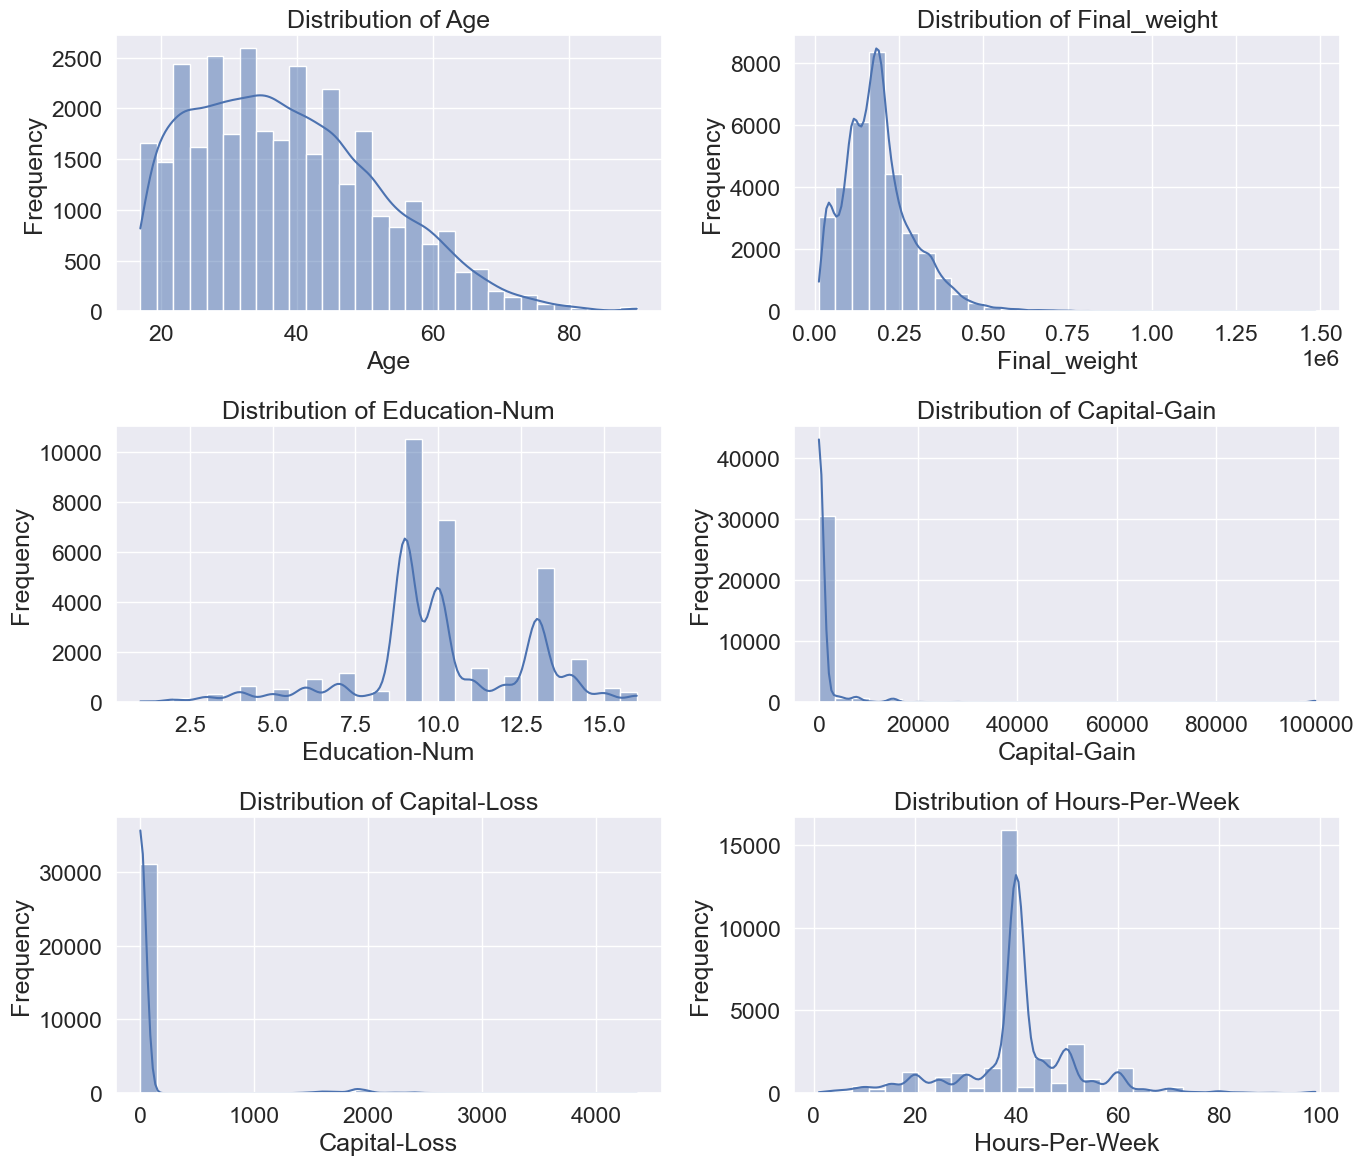

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_cols = df.select_dtypes(include=["number"]).columns.tolist()

# Define subplot grid size
n_cols = 2
n_rows = (len(numerical_cols) + 1) // n_cols  # auto-adjust number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()

# Plot each histogram in a subplot
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove unused axes if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Checking the distribution of categorical variable

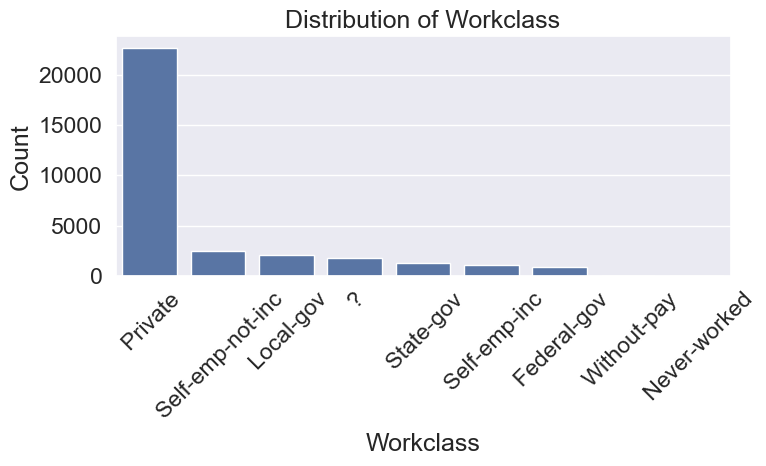

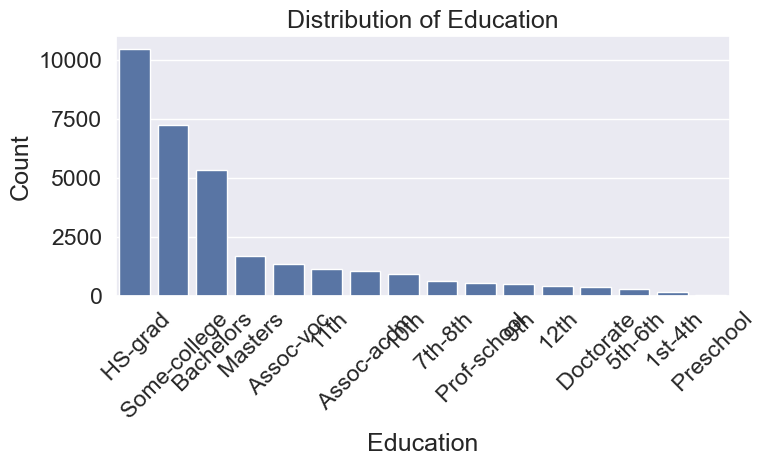

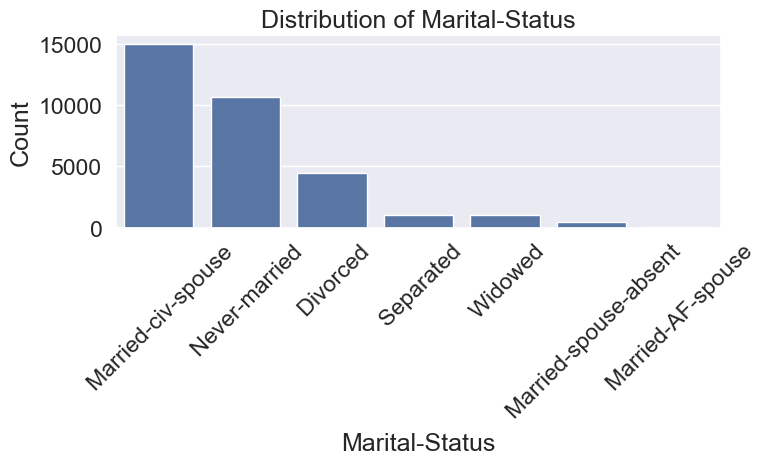

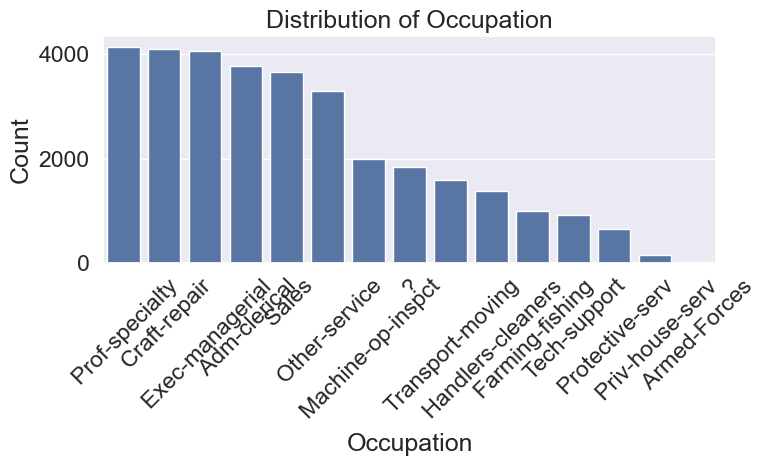

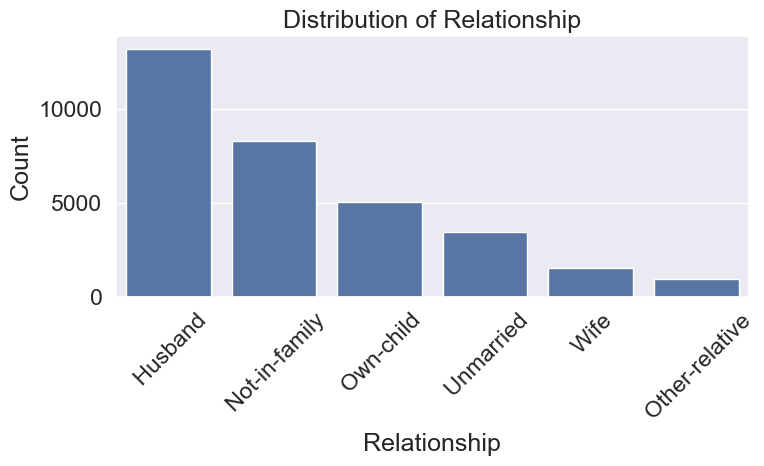

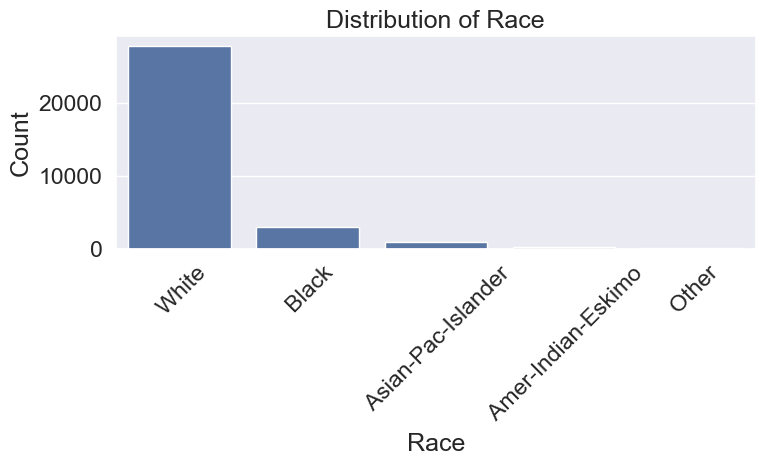

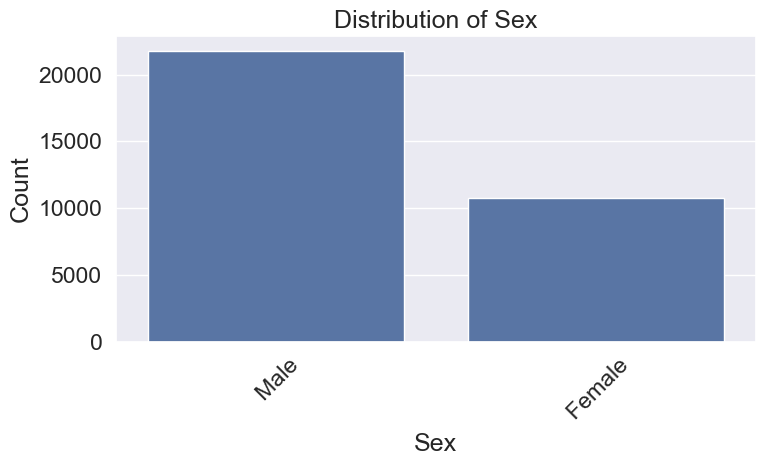

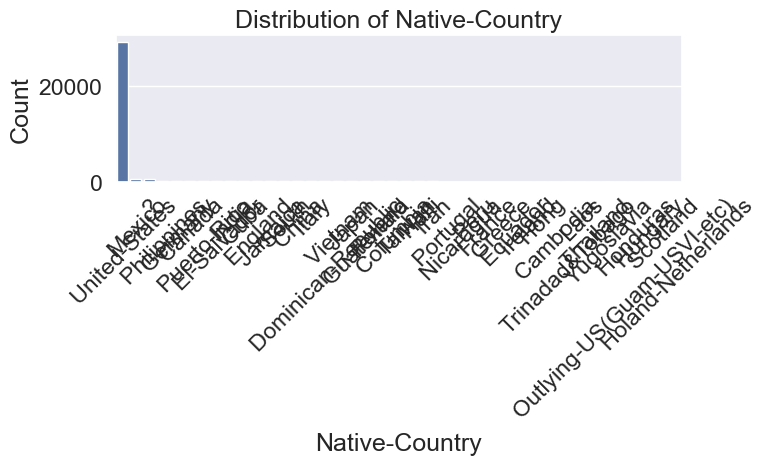

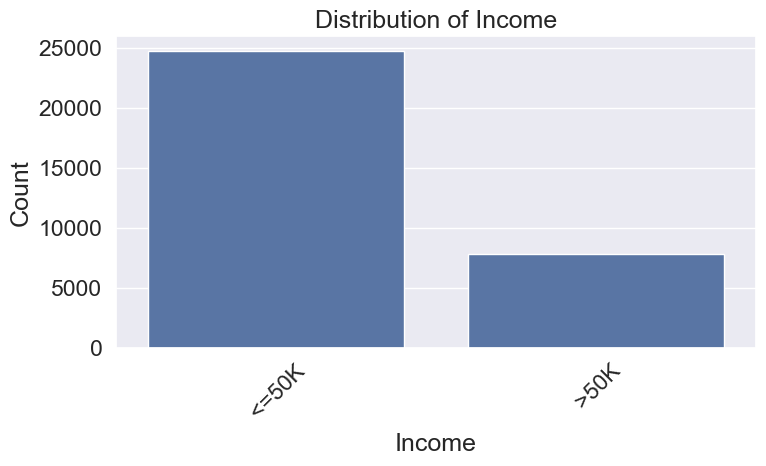

In [442]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns
categorical_df = ["Workclass","Education","Marital-Status","Occupation","Relationship","Race","Sex","Native-Country","Income"]

# Loop through each column and plot
for col in categorical_df:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [443]:
df.columns

Index(['Age', 'Workclass', 'Final_weight', 'Education', 'Education-Num',
       'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-Gain', 'Capital-Loss', 'Hours-Per-Week', 'Native-Country',
       'Income'],
      dtype='object')

<Figure size 1500x1000 with 0 Axes>

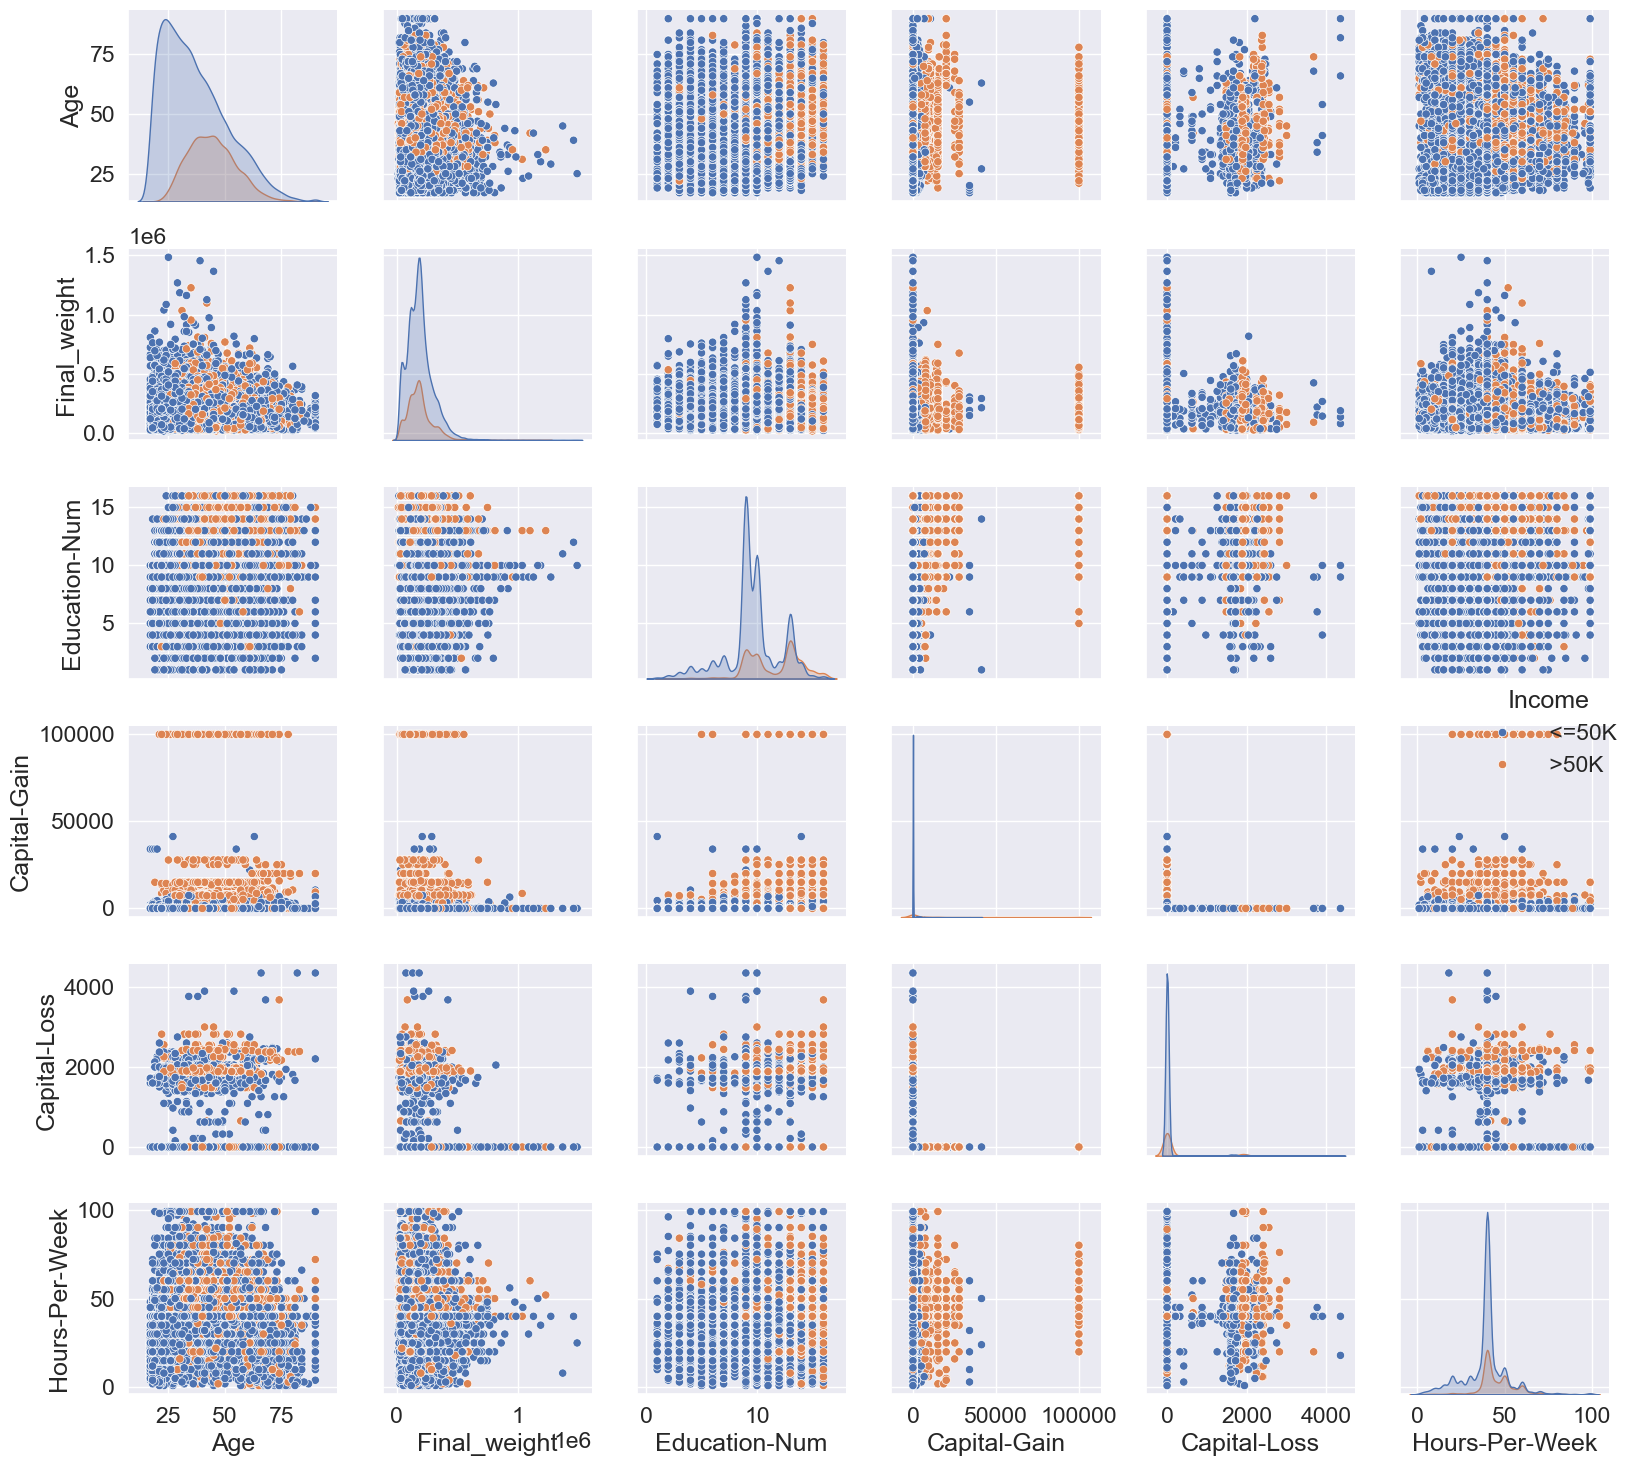

In [444]:
selected_columns = ["Age","Final_weight","Education-Num","Capital-Gain","Capital-Loss","Hours-Per-Week","Income"]
plt.figure(figsize = (15,10))
sns.pairplot(df[selected_columns], hue = "Income")
plt.tight_layout()
plt.show()

# Checking and treating the outliers:

In [445]:
numerical_cols = df.select_dtypes(include = ["number"]).columns

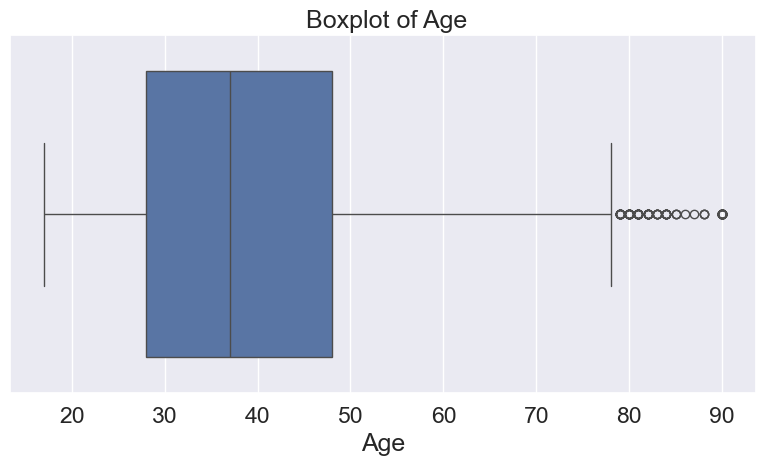

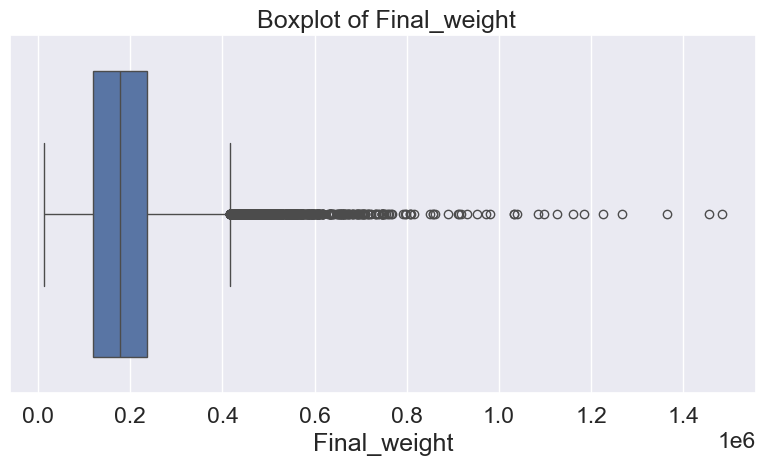

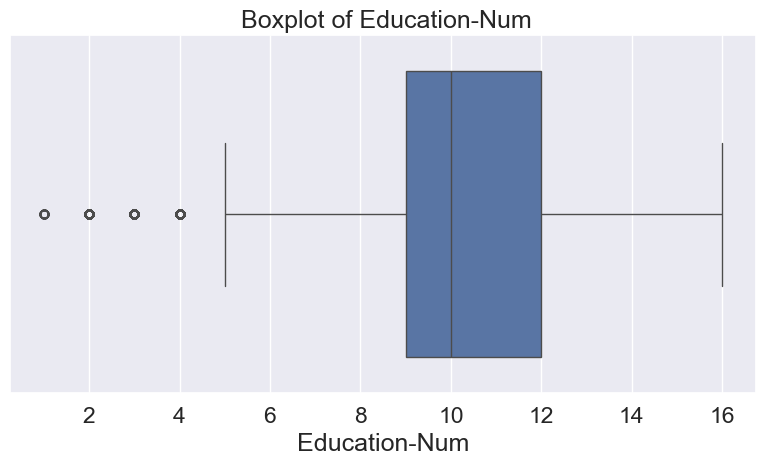

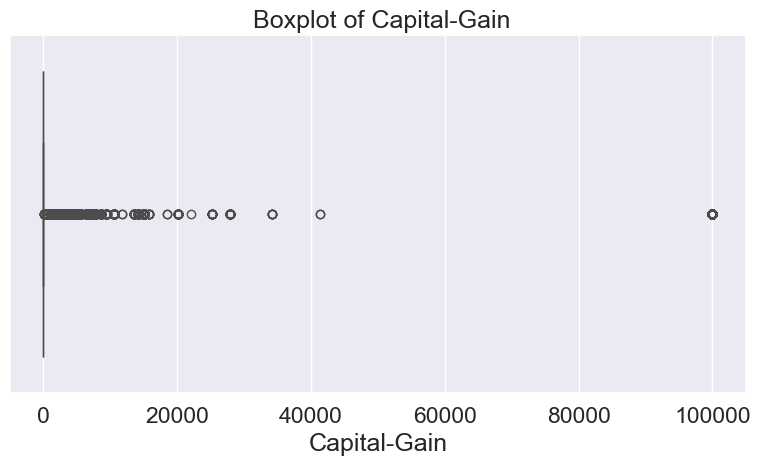

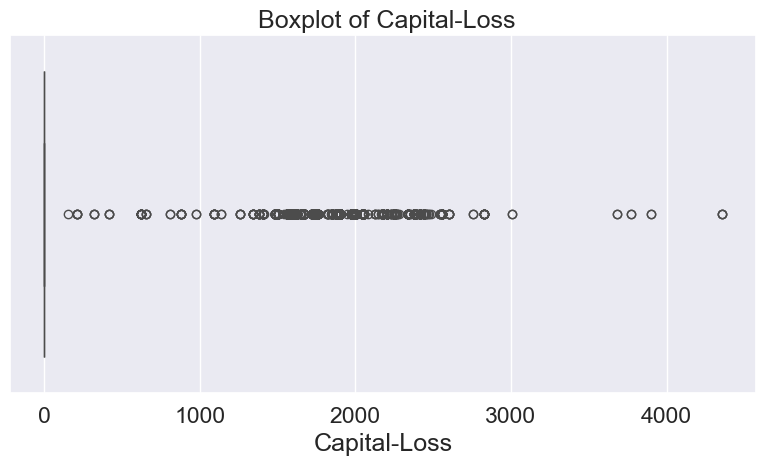

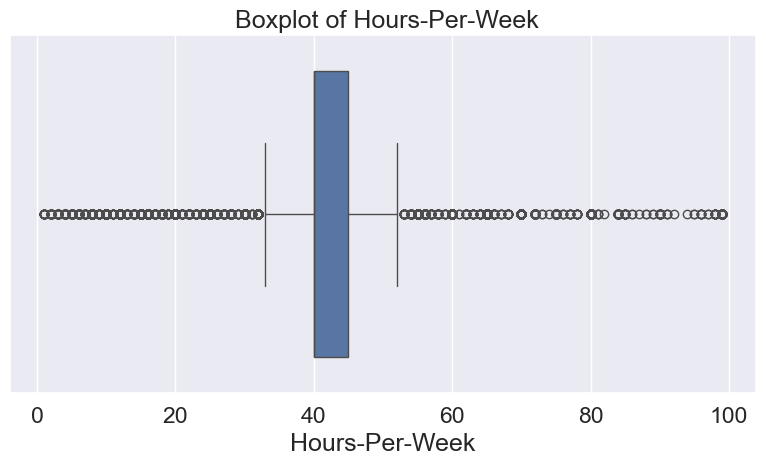

In [446]:
for col in numerical_cols:
    plt.figure(figsize = (8,5))
    sns.boxplot(x = df[col])
    plt.title(f" Boxplot of {col}")
    plt.tight_layout()
    plt.show()

In [447]:
def detect_outlier_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Store results
total_rows = len(df)
outlier_summary = {}

# Apply to each numeric column
for col in numerical_cols:
    outlier_mask = detect_outlier_iqr(df[col])
    outlier_count = outlier_mask.sum()
    percentage = (outlier_count / total_rows) * 100

    outlier_summary[col] = {
        'Outlier Count': outlier_count,
        'Percentage': round(percentage, 2)
    }

# Print the summary
print("\nColumn-wise Outlier Percentage:\n")
for col, stats in outlier_summary.items():
    print(f"{col} → {stats['Outlier Count']} outliers ({stats['Percentage']}%)")



Column-wise Outlier Percentage:

Age → 142 outliers (0.44%)
Final_weight → 993 outliers (3.05%)
Education-Num → 1193 outliers (3.67%)
Capital-Gain → 2712 outliers (8.34%)
Capital-Loss → 1519 outliers (4.67%)
Hours-Per-Week → 9002 outliers (27.67%)


# We will check how many rows have outliers out of the total rows

In [448]:
# Create a mask for rows with at least one outlier
combined_outlier_mask = pd.DataFrame(False, index=df.index, columns=numerical_cols)

for col in numerical_cols:
    combined_outlier_mask[col] = detect_outlier_iqr(df[col])

# Any row with at least one True is a row with an outlier
rows_with_outliers = combined_outlier_mask.any(axis=1)
num_rows_with_outliers = rows_with_outliers.sum()
percentage_rows_with_outliers = (num_rows_with_outliers / total_rows) * 100

print(f"\nTotal rows with at least one outlier: {num_rows_with_outliers} out of {total_rows} "
      f"({percentage_rows_with_outliers:.2f}%)")



Total rows with at least one outlier: 13554 out of 32537 (41.66%)


#### We can see that we have 13554 rows have outlier which is 41.66% of the total data
#### So we will treat them using Capping method

In [449]:
df_capped = df.copy()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_capped[col] = df[col].clip(lower, upper) # capping the values

# Checking outliers after treating

In [450]:
# Recalculate total rows
total_rows = len(df_capped)
outlier_summary_after = {}

# Apply the same detection on capped data
for col in numerical_cols:
    outlier_mask = detect_outlier_iqr(df_capped[col])
    outlier_count = outlier_mask.sum()
    percentage = (outlier_count / total_rows) * 100

    outlier_summary_after[col] = {
        'Outlier Count': outlier_count,
        'Percentage': round(percentage, 2)
    }

# Print the summary
print("\nOutliers AFTER capping:\n")
for col, stats in outlier_summary_after.items():
    print(f"{col} → {stats['Outlier Count']} outliers ({stats['Percentage']}%)")



Outliers AFTER capping:

Age → 0 outliers (0.0%)
Final_weight → 0 outliers (0.0%)
Education-Num → 0 outliers (0.0%)
Capital-Gain → 0 outliers (0.0%)
Capital-Loss → 0 outliers (0.0%)
Hours-Per-Week → 0 outliers (0.0%)


## Now we will see for the distribution of all the variables.
## And also check the skewness

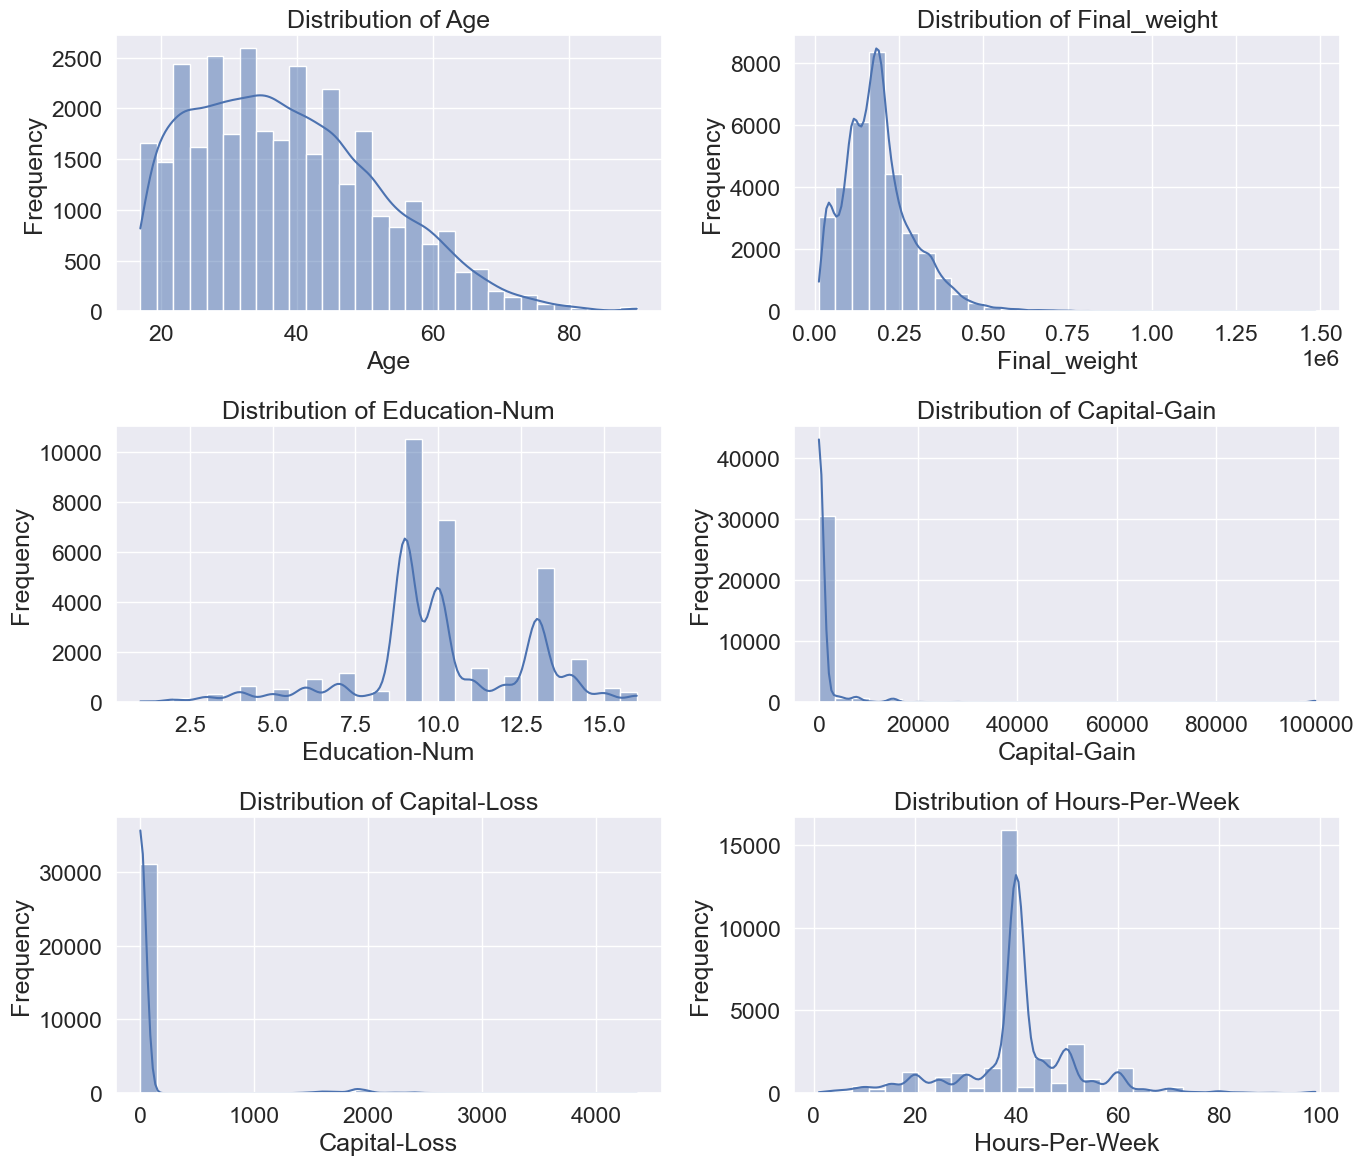

In [451]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_cols = df_capped.select_dtypes(include=["number"]).columns.tolist()

# Define subplot grid size
n_cols = 2
n_rows = (len(numerical_cols) + 1) // n_cols  # auto-adjust number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()

# Plot each histogram in a subplot
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove unused axes if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [452]:
Skewness_before = df_capped.select_dtypes(include =["number"]).skew()
print(Skewness_before)

Age               0.513435
Final_weight      0.548158
Education-Num    -0.033530
Capital-Gain      0.000000
Capital-Loss      0.000000
Hours-Per-Week    0.438212
dtype: float64


# Almost everyone is normally distributed

### But we can still see how it looks like after the transformation

In [453]:
After_Transformation_df = df_capped.copy()
After_Transformation_df["Age"] = np.sqrt(After_Transformation_df["Age"])
After_Transformation_df["Final_weight"] = np.sqrt(After_Transformation_df["Final_weight"])

In [454]:
Skewness_After = After_Transformation_df.select_dtypes(include = ["number"]).skew()
Skewness_After

Age               0.180452
Final_weight     -0.133246
Education-Num    -0.033530
Capital-Gain      0.000000
Capital-Loss      0.000000
Hours-Per-Week    0.438212
dtype: float64

# Lets go with the transformed data

In [455]:
After_Transformation_df.head(2)

,Age,Workclass,Final_weight,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,6.244998,State-gov,278.416954,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
1,7.071068,Self-emp-not-inc,288.636450,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50K


# Converting categorical variable to numerical using Label Encoder

In [456]:
# Identify categorical columns
cat_cols = After_Transformation_df.select_dtypes(include='object').columns
# Initialize LabelEncoder
le = LabelEncoder()
# Apply Label Encoding to all object (categorical) columns
for col in cat_cols:
    After_Transformation_df[col] = le.fit_transform(After_Transformation_df[col])

# Now applying the Standard Scaler to the numerical columns

In [457]:
# scaler = StandardScaler()

# # Fit and transform only the 'final_weight' column
# After_Transformation_df['Final_weight'] = scaler.fit_transform(After_Transformation_df[['Final_weight']])


In [458]:
# # Step 1: Identify numerical columns

# numerical_cols = After_Transformation_df.select_dtypes(include='number').columns.drop('Income')

# # Step 2: Initialize the scaler
# scaler = StandardScaler()

# # Step 3: Fit and transform the numerical columns
# scaled_numerical = scaler.fit_transform(After_Transformation_df[numerical_cols])

# # Step 4: Create a new DataFrame with scaled values
# scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_cols, index=After_Transformation_df.index)

# # Step 5: Replace original numerical columns with scaled ones
# After_Transformation_df[numerical_cols] = scaled_numerical_df

In [459]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of columns to scale
cols_to_scale = ['Age', 'Final_weight', 'Education-Num', 'Hours-Per-Week', 'Capital-Gain', 'Capital-Loss']

# Apply scaler only to selected columns
After_Transformation_df[cols_to_scale] = scaler.fit_transform(After_Transformation_df[cols_to_scale])


In [460]:
df_final = After_Transformation_df.copy()

In [461]:
df_final.head(5)

,Age,Workclass,Final_weight,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,0.120656,7,-1.210552,9,1.168918,4,1,1,4,1,0.0,0.0,-0.194472,39,0
1,0.881425,6,-1.121176,9,1.168918,2,4,0,4,1,0.0,0.0,-1.406640,39,0
2,0.046442,4,0.415793,11,-0.457496,0,6,1,4,1,0.0,0.0,-0.194472,39,0
3,1.073942,4,0.591608,1,-1.270703,2,6,0,2,1,0.0,0.0,-0.194472,39,0
4,-0.757465,4,1.442118,9,1.168918,2,10,5,2,0,0.0,0.0,-0.194472,5,0


In [462]:
df_final.sample(5)

,Age,Workclass,Final_weight,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
21175,2.291637,7,-0.653798,15,-0.050893,5,12,1,4,1,0.0,0.0,-1.406640,39,0
19789,-0.420995,6,-1.957966,14,1.982125,2,10,0,4,1,0.0,0.0,0.613641,39,1
19348,1.443276,4,0.163854,9,1.168918,2,6,0,4,1,0.0,0.0,-0.194472,22,1
983,1.502973,6,-0.208168,11,-0.457496,4,5,4,4,1,0.0,0.0,0.128773,39,0
27000,-0.182261,4,0.583161,1,-1.270703,5,8,4,4,1,0.0,0.0,-1.406640,39,0


## Now after the scaling the columns looks good and 
## now we can send it for training and testing

# Dividing it into training and testing

In [463]:
x = df_final.drop('Income', axis = 1)
y = df_final['Income']

In [464]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 3)

In [465]:
print(f" x_train shape : {x_train.shape}")
print(f" x_test shape : {x_test.shape}")
print(f" y_train shape : {y_train.shape}")
print(f" y_test shape : {y_test.shape}")

 x_train shape : (22775, 14)
 x_test shape : (9762, 14)
 y_train shape : (22775,)
 y_test shape : (9762,)


## This user define function is only for Binary classification

In [466]:
training_scores_accuracy = []
training_scores_precision = []
training_scores_recall = []
training_scores_f1 = []

testing_scores_accuracy = []
testing_scores_precision = []
testing_scores_recall = []
testing_scores_f1 = []
testing_scores_auc = []

In [467]:
def evaluate_classification_model(model, x_train, y_train, x_test, y_test):
    """
    Trains the model and prints classification metrics.
    """
    # Fit the model
    model.fit(x_train, y_train)

    # Predict
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_rec = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

    # Testing metrics
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_rec = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    # Append metrics to lists (optional)
    training_scores_accuracy.append(train_acc)
    training_scores_precision.append(train_prec)
    training_scores_recall.append(train_rec)
    training_scores_f1.append(train_f1)

    testing_scores_accuracy.append(test_acc)
    testing_scores_precision.append(test_prec)
    testing_scores_recall.append(test_rec)
    testing_scores_f1.append(test_f1)

    # ROC-AUC for binary classification (if supported)
    if len(set(y_test)) == 2 and hasattr(model, "predict_proba"):
        try:
            y_test_prob = model.predict_proba(x_test)[:, 1]
            test_auc = roc_auc_score(y_test, y_test_prob)
            testing_scores_auc.append(test_auc)
            auc_display = f"ROC-AUC = {test_auc:.4f}"
        except Exception as e:
            auc_display = f"ROC-AUC = Error ({e})"
    else:
        auc_display = "ROC-AUC = N/A"

    # Print evaluation summary
    print(f"\nModel: {model.__class__.__name__}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print("-" * 70)


# Logistic Regression

In [468]:
evaluate_classification_model(
    model = LogisticRegression(max_iter=1000),
    x_train = x_train,
    y_train = y_train,
    x_test = x_test,
    y_test = y_test
)


Model: LogisticRegression
Test Accuracy: 0.8097

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7491
           1       0.64      0.42      0.51      2271

    accuracy                           0.81      9762
   macro avg       0.74      0.68      0.70      9762
weighted avg       0.79      0.81      0.80      9762

Confusion Matrix:
[[6943  548]
 [1310  961]]
----------------------------------------------------------------------


# Ridge Classifier

In [469]:
from sklearn.linear_model import RidgeClassifier

In [470]:
evaluate_classification_model(
    model=RidgeClassifier(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: RidgeClassifier
Test Accuracy: 0.8116

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7491
           1       0.67      0.37      0.48      2271

    accuracy                           0.81      9762
   macro avg       0.75      0.66      0.68      9762
weighted avg       0.79      0.81      0.79      9762

Confusion Matrix:
[[7084  407]
 [1432  839]]
----------------------------------------------------------------------


# Lasso Classifier (Logistic Regression with L1 penalty)

In [471]:
evaluate_classification_model(
    model=LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: LogisticRegression
Test Accuracy: 0.8098

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7491
           1       0.64      0.42      0.51      2271

    accuracy                           0.81      9762
   macro avg       0.74      0.68      0.70      9762
weighted avg       0.79      0.81      0.80      9762

Confusion Matrix:
[[6943  548]
 [1309  962]]
----------------------------------------------------------------------


# ElasticNet Classifier (Logistic Regression with elasticnet)

In [472]:
evaluate_classification_model(
    model=LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: LogisticRegression
Test Accuracy: 0.8098

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7491
           1       0.64      0.42      0.51      2271

    accuracy                           0.81      9762
   macro avg       0.74      0.68      0.70      9762
weighted avg       0.79      0.81      0.80      9762

Confusion Matrix:
[[6944  547]
 [1310  961]]
----------------------------------------------------------------------


# Decision Tree Classifier

In [473]:
evaluate_classification_model(
    model=DecisionTreeClassifier(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: DecisionTreeClassifier
Test Accuracy: 0.7803

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      7491
           1       0.53      0.55      0.54      2271

    accuracy                           0.78      9762
   macro avg       0.69      0.70      0.70      9762
weighted avg       0.78      0.78      0.78      9762

Confusion Matrix:
[[6362 1129]
 [1016 1255]]
----------------------------------------------------------------------


# Random Forest Classifier

In [474]:
evaluate_classification_model(
    model=RandomForestClassifier(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)



Model: RandomForestClassifier
Test Accuracy: 0.8303

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7491
           1       0.65      0.58      0.61      2271

    accuracy                           0.83      9762
   macro avg       0.76      0.74      0.75      9762
weighted avg       0.82      0.83      0.83      9762

Confusion Matrix:
[[6794  697]
 [ 960 1311]]
----------------------------------------------------------------------


# Ada Boost Classifier

In [475]:
evaluate_classification_model(
    model=AdaBoostClassifier(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)



Model: AdaBoostClassifier
Test Accuracy: 0.8416

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7491
           1       0.69      0.57      0.63      2271

    accuracy                           0.84      9762
   macro avg       0.79      0.75      0.76      9762
weighted avg       0.83      0.84      0.84      9762

Confusion Matrix:
[[6916  575]
 [ 971 1300]]
----------------------------------------------------------------------


# Gradient Boost Classifier


In [476]:
evaluate_classification_model(
    model=GradientBoostingClassifier(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: GradientBoostingClassifier
Test Accuracy: 0.8435

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7491
           1       0.70      0.56      0.63      2271

    accuracy                           0.84      9762
   macro avg       0.79      0.75      0.76      9762
weighted avg       0.84      0.84      0.84      9762

Confusion Matrix:
[[6953  538]
 [ 990 1281]]
----------------------------------------------------------------------


# XGBoost Classifier

In [477]:
evaluate_classification_model(
    model=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: XGBClassifier
Test Accuracy: 0.8375

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      7491
           1       0.67      0.59      0.63      2271

    accuracy                           0.84      9762
   macro avg       0.78      0.75      0.76      9762
weighted avg       0.83      0.84      0.83      9762

Confusion Matrix:
[[6843  648]
 [ 938 1333]]
----------------------------------------------------------------------


# CatBoost Classifier

In [478]:
evaluate_classification_model(
    model=CatBoostClassifier(verbose=0),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: CatBoostClassifier
Test Accuracy: 0.8443

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7491
           1       0.69      0.59      0.64      2271

    accuracy                           0.84      9762
   macro avg       0.79      0.76      0.77      9762
weighted avg       0.84      0.84      0.84      9762

Confusion Matrix:
[[6891  600]
 [ 920 1351]]
----------------------------------------------------------------------


# SVM Classifier

In [479]:
evaluate_classification_model(
    model=SVC(probability=True),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: SVC
Test Accuracy: 0.8140

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7491
           1       0.71      0.34      0.46      2271

    accuracy                           0.81      9762
   macro avg       0.77      0.65      0.67      9762
weighted avg       0.80      0.81      0.79      9762

Confusion Matrix:
[[7170  321]
 [1495  776]]
----------------------------------------------------------------------


# KNN Classifier

In [480]:
evaluate_classification_model(
    model=KNeighborsClassifier(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)



Model: KNeighborsClassifier
Test Accuracy: 0.8206

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7491
           1       0.62      0.59      0.60      2271

    accuracy                           0.82      9762
   macro avg       0.75      0.74      0.74      9762
weighted avg       0.82      0.82      0.82      9762

Confusion Matrix:
[[6681  810]
 [ 941 1330]]
----------------------------------------------------------------------


# Voting Regressor Classifier (actually a Voting Classifier)


In [481]:
evaluate_classification_model(
    model=VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('knn', KNeighborsClassifier())
    ], voting='soft'),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: VotingClassifier
Test Accuracy: 0.8317

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7491
           1       0.68      0.53      0.60      2271

    accuracy                           0.83      9762
   macro avg       0.77      0.73      0.74      9762
weighted avg       0.82      0.83      0.82      9762

Confusion Matrix:
[[6912  579]
 [1064 1207]]
----------------------------------------------------------------------


# Bagging Regressor Classifier (actually a Bagging Classifier)

In [482]:
evaluate_classification_model(
    model=BaggingClassifier(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: BaggingClassifier
Test Accuracy: 0.8170

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      7491
           1       0.63      0.52      0.57      2271

    accuracy                           0.82      9762
   macro avg       0.75      0.71      0.73      9762
weighted avg       0.81      0.82      0.81      9762

Confusion Matrix:
[[6804  687]
 [1099 1172]]
----------------------------------------------------------------------


# Naive Bayes

In [483]:
evaluate_classification_model(
    model=GaussianNB(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: GaussianNB
Test Accuracy: 0.7893

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.86      7491
           1       0.54      0.72      0.61      2271

    accuracy                           0.79      9762
   macro avg       0.72      0.76      0.73      9762
weighted avg       0.82      0.79      0.80      9762

Confusion Matrix:
[[6073 1418]
 [ 639 1632]]
----------------------------------------------------------------------


## Add Model Names List that I have used

In [489]:

model_names = [
    "Logistic Regression", 
    "Ridge Classifier", 
    "Lasso", 
    "ElasticNet",
    "Decision Tree", 
    "Random Forest", 
    "AdaBoost", 
    "Gradient Boost",
    "XGBoost", 
    "CatBoost", 
    "SVM", 
    "KNN", 
    "Voting Classifier", 
    "Bagging",
    "Naive Bayes"
]

# Ensure all metric lists are exactly the same length as model_names

In [490]:
# Assuming testing_scores_accuracy, testing_scores_precision, testing_scores_recall, 
# testing_scores_f1, and testing_scores_auc are defined and contain the respective scores.
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': testing_scores_accuracy,
    'Precision': testing_scores_precision,
    'Recall': testing_scores_recall,
    'F1 Score': testing_scores_f1,
})

# Accuracy

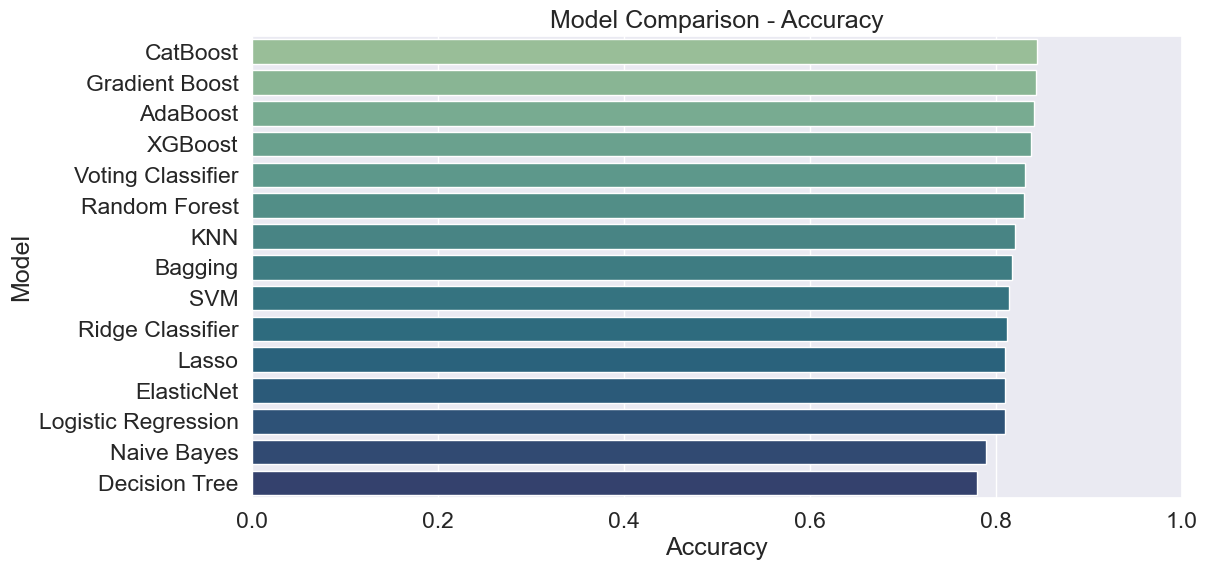

In [491]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values(by='Accuracy', ascending=False), palette='crest')
plt.title('Model Comparison - Accuracy')
plt.xlim(0, 1)
plt.show()

# F1 Score plot

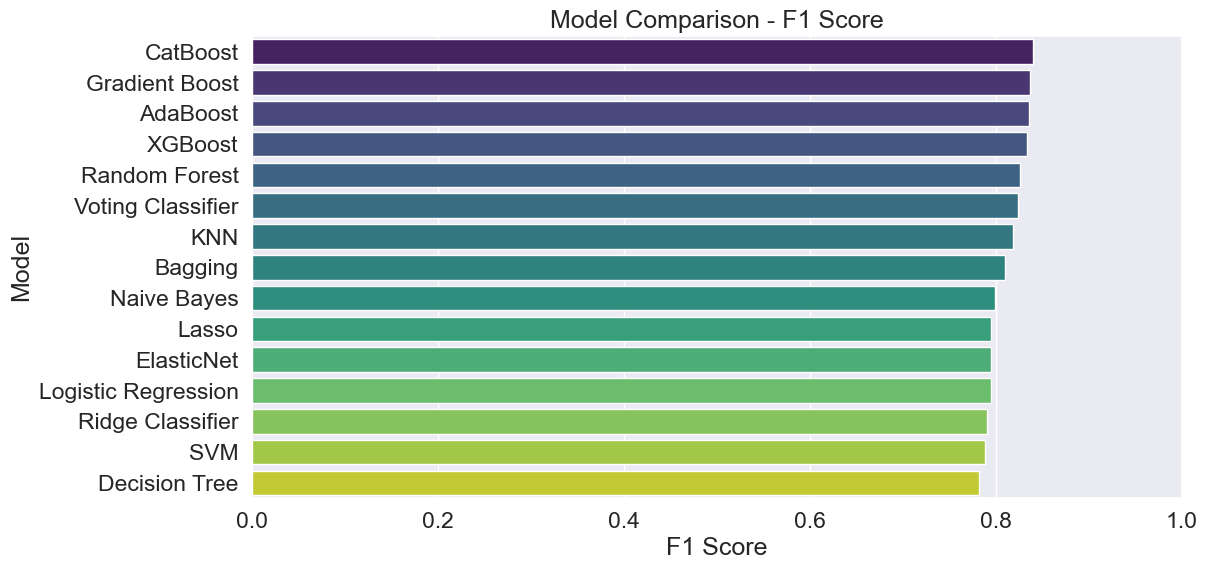

In [492]:
plt.figure(figsize=(12, 6))
sns.barplot(x='F1 Score', y='Model', data=results_df.sort_values(by='F1 Score', ascending=False), palette='viridis')
plt.title('Model Comparison - F1 Score')
plt.xlim(0, 1)
plt.show()


# Plot ROC Curves for All Models

In [493]:
models = [
    LogisticRegression(max_iter=1000),
    RidgeClassifier(),
    LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    CatBoostClassifier(verbose=0),
    SVC(probability=True),
    KNeighborsClassifier(),
    VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('knn', KNeighborsClassifier())
    ], voting='soft'),
    BaggingClassifier(),
    GaussianNB()
]

In [494]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

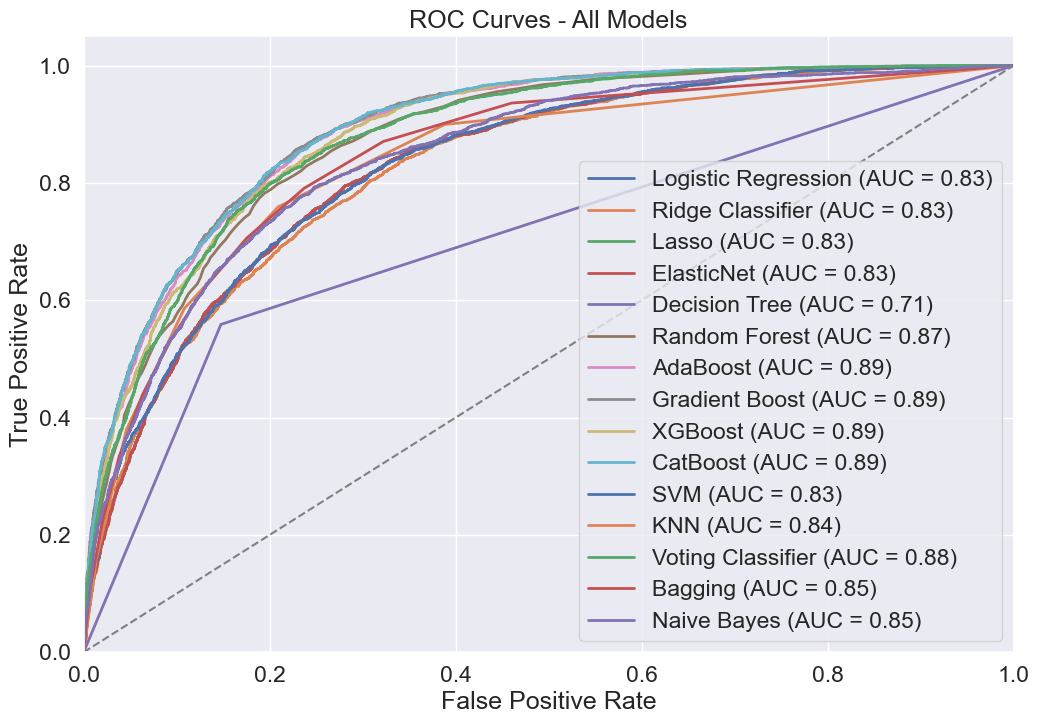

In [495]:
plt.figure(figsize=(12, 8))

for name, model in zip(model_names, models):
    try:
        # Fit model
        model.fit(x_train, y_train)

        # Predict probabilities or decision function
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(x_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(x_test)
        else:
            print(f"Skipping {name}: no probability or decision output.")
            continue

        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_score)
        auc_score = roc_auc_score(y_test, y_score)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc_score:.2f})")

    except Exception as e:
        print(f"{name} skipped (error: {e})")

# Finalize the plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Using Hyper Parameter Tuning

In [496]:
x = df_final.drop('Income', axis = 1)
y = df_final['Income']

In [497]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 3)

In [498]:
print(f" x_train shape : {x_train.shape}")
print(f" x_test shape : {x_test.shape}")
print(f" y_train shape : {y_train.shape}")
print(f" y_test shape : {y_test.shape}")

 x_train shape : (22775, 14)
 x_test shape : (9762, 14)
 y_train shape : (22775,)
 y_test shape : (9762,)


In [499]:
training_scores_accuracy = []
training_scores_precision = []
training_scores_recall = []
training_scores_f1 = []

testing_scores_accuracy = []
testing_scores_precision = []
testing_scores_recall = []
testing_scores_f1 = []
testing_scores_auc = []

In [500]:
def evaluate_classification_model(model, x_train, y_train, x_test, y_test):
    """
    Trains the model and prints classification metrics.
    """
    # Fit the model
    model.fit(x_train, y_train)

    # Predict
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_rec = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

    # Testing metrics
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_rec = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    # Append metrics to lists (optional)
    training_scores_accuracy.append(train_acc)
    training_scores_precision.append(train_prec)
    training_scores_recall.append(train_rec)
    training_scores_f1.append(train_f1)

    testing_scores_accuracy.append(test_acc)
    testing_scores_precision.append(test_prec)
    testing_scores_recall.append(test_rec)
    testing_scores_f1.append(test_f1)

    # ROC-AUC for binary classification (if supported)
    if len(set(y_test)) == 2 and hasattr(model, "predict_proba"):
        try:
            y_test_prob = model.predict_proba(x_test)[:, 1]
            test_auc = roc_auc_score(y_test, y_test_prob)
            testing_scores_auc.append(test_auc)
            auc_display = f"ROC-AUC = {test_auc:.4f}"
        except Exception as e:
            auc_display = f"ROC-AUC = Error ({e})"
    else:
        auc_display = "ROC-AUC = N/A"

    # Print evaluation summary
    print(f"\nModel: {model.__class__.__name__}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print("-" * 70)


# Grid search CV

# Logistic Regression

In [501]:
log_reg = LogisticRegression(max_iter=200)
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
# Fit the model
grid_search.fit(x_train, y_train)
# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters for Logistic Regression:", best_params)
print("Best Score for Logistic Regression:", best_score)

# After grid search
logistic_regression = grid_search.best_estimator_

Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best Score for Logistic Regression: 0.8059714599341383


In [502]:
evaluate_classification_model(
    model=logistic_regression,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
)



Model: LogisticRegression
Test Accuracy: 0.8098

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7491
           1       0.64      0.42      0.51      2271

    accuracy                           0.81      9762
   macro avg       0.74      0.67      0.70      9762
weighted avg       0.79      0.81      0.80      9762

Confusion Matrix:
[[6945  546]
 [1311  960]]
----------------------------------------------------------------------


# Ridge Classifier

In [503]:
# Step 1: Create base RidgeClassifier model
ridge_clf = RidgeClassifier()

# Step 2: Define parameter grid
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0],   # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']  # Supported solvers
}

# Step 3: Create GridSearchCV object
grid_search_ridge = GridSearchCV(
    estimator=ridge_clf,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Step 4: Fit the model
grid_search_ridge.fit(x_train, y_train)

# Step 5: Extract best parameters and score
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_

print("Best Parameters for Ridge Classifier:", best_params_ridge)
print("Best Score for Ridge Classifier:", best_score_ridge)

# After grid search
ridge_classifier = grid_search_ridge.best_estimator_


Best Parameters for Ridge Classifier: {'alpha': 100.0, 'solver': 'lsqr'}
Best Score for Ridge Classifier: 0.8035565312843029


In [504]:
evaluate_classification_model(
    model=ridge_classifier,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
)


Model: RidgeClassifier
Test Accuracy: 0.8113

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7491
           1       0.67      0.37      0.48      2271

    accuracy                           0.81      9762
   macro avg       0.75      0.66      0.68      9762
weighted avg       0.79      0.81      0.79      9762

Confusion Matrix:
[[7085  406]
 [1436  835]]
----------------------------------------------------------------------


# Lasso Classifier

In [505]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Create base Lasso Classifier (Logistic Regression with L1 penalty)
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Step 2: Define parameter grid
param_grid_lasso = {
    'C': [0.01, 0.1, 1, 10, 100],   # Inverse of regularization strength
    'solver': ['liblinear']         # liblinear supports l1
}

# Step 3: Create GridSearchCV object
grid_search_lasso = GridSearchCV(
    estimator=lasso_clf,
    param_grid=param_grid_lasso,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Step 4: Fit the model
grid_search_lasso.fit(x_train, y_train)

# Step 5: Extract best parameters and score
best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_

print("Best Parameters for Lasso Classifier:", best_params_lasso)
print("Best Cross-Validated Score (Accuracy):", best_score_lasso)

# Step 6: Get the best estimator
best_lasso_model = grid_search_lasso.best_estimator_

Best Parameters for Lasso Classifier: {'C': 0.1, 'solver': 'liblinear'}
Best Cross-Validated Score (Accuracy): 0.805927552140505


In [506]:
# Step 7: Evaluate using your custom function
evaluate_classification_model(
    model=best_lasso_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: LogisticRegression
Test Accuracy: 0.8097

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7491
           1       0.64      0.42      0.51      2271

    accuracy                           0.81      9762
   macro avg       0.74      0.68      0.70      9762
weighted avg       0.79      0.81      0.80      9762

Confusion Matrix:
[[6941  550]
 [1308  963]]
----------------------------------------------------------------------


# Elastic Net Classifier

In [507]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Step 1: Create base ElasticNet Classifier
elasticnet_clf = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000)

# Step 2: Define parameter grid
param_grid_elastic = {
    'C': [0.1, 1, 10],                         # Regularization strength (inverse)
    'l1_ratio': [0.1, 0.5, 0.9],               # Mix of L1 and L2
    'max_iter': [500, 1000],                   # Max iterations for convergence
    'tol': [1e-4, 1e-3],                       # Convergence tolerance
    'class_weight': [None, 'balanced'],        # For handling imbalance
    'fit_intercept': [True, False],            # Whether to fit the intercept
    'random_state': [3] 
}

# Step 3: Create GridSearchCV
grid_search_elastic = GridSearchCV(
    estimator=elasticnet_clf,
    param_grid=param_grid_elastic,
    cv=5,
    verbose=2,
    scoring='accuracy',
    n_jobs=-1
)

# Step 4: Fit the grid search
grid_search_elastic.fit(x_train, y_train)

# Step 5: Extract best parameters and score
best_params_elastic = grid_search_elastic.best_params_
best_score_elastic = grid_search_elastic.best_score_

print("Best Parameters for ElasticNet Classifier:", best_params_elastic)
print("Best Cross-Validated Score (Accuracy):", best_score_elastic)

# Step 6: Get the best model
best_elastic_model = grid_search_elastic.best_estimator_


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters for ElasticNet Classifier: {'C': 0.1, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 500, 'random_state': 3, 'tol': 0.0001}
Best Cross-Validated Score (Accuracy): 0.8061470911086717


In [508]:
# Step 7: Evaluate using your custom function
evaluate_classification_model(
    model=best_elastic_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: LogisticRegression
Test Accuracy: 0.8100

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7491
           1       0.64      0.42      0.51      2271

    accuracy                           0.81      9762
   macro avg       0.74      0.68      0.70      9762
weighted avg       0.79      0.81      0.80      9762

Confusion Matrix:
[[6947  544]
 [1311  960]]
----------------------------------------------------------------------


# Decision Tree 

In [509]:
# Step 1: Define the model
decision_tree_clf = DecisionTreeClassifier(random_state=3)

# Step 2: Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 50],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree_clf,
    param_grid=param_grid,
    scoring='accuracy',  # Classification scoring metric
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Step 4: Fit the model
grid_search.fit(x_train, y_train)

# Step 5: Output best hyperparameters
print("Best Parameters for Decision Tree Classifier:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 6: Get the best model
best_decision_tree_model = grid_search.best_estimator_


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters for Decision Tree Classifier: {'ccp_alpha': 0.0, 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8319648737650933


In [510]:
evaluate_classification_model(
    model=best_decision_tree_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)



Model: DecisionTreeClassifier
Test Accuracy: 0.8367

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7491
           1       0.67      0.58      0.62      2271

    accuracy                           0.84      9762
   macro avg       0.78      0.75      0.76      9762
weighted avg       0.83      0.84      0.83      9762

Confusion Matrix:
[[6855  636]
 [ 958 1313]]
----------------------------------------------------------------------


# Random Forest

In [511]:
# Step 1: Initialize the classifier
random_forest_classifier = RandomForestClassifier(random_state=3, n_jobs=-1)

# Step 2: Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],       # Number of trees
    'max_depth': [None, 5, 10, 15],       # Max tree depth
    'min_samples_split': [2, 5, 10],      # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Min samples at a leaf node
    'max_features': ['sqrt', 'log2'],     # Features to consider at each split
}

# Step 3: Define GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest_classifier,
    param_grid=param_grid,
    scoring='accuracy',    # Use accuracy for classification
    cv=3,                  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Step 4: Fit the grid search
grid_search.fit(x_train, y_train)

# Step 5: Output best hyperparameters
print("Best Parameters for Random Forest Classifier:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 6: Get the best model
best_random_forest_model = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters for Random Forest Classifier: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.8377606189960131


In [512]:
# Step 7: Evaluate the best model
evaluate_classification_model(
    model=best_random_forest_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: RandomForestClassifier
Test Accuracy: 0.8408

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7491
           1       0.69      0.57      0.63      2271

    accuracy                           0.84      9762
   macro avg       0.78      0.75      0.76      9762
weighted avg       0.83      0.84      0.84      9762

Confusion Matrix:
[[6907  584]
 [ 970 1301]]
----------------------------------------------------------------------


# Support Vector Regressor

In [513]:
# Step 1: Initialize the model
svc_model = SVC()

# Step 2: Define the hyperparameter grid
param_grid = {
    'kernel': ['rbf', 'linear'],     # Kernel type
    'C': [0.1, 1, 10],               # Regularization parameter
    'gamma': ['scale', 'auto']      # Kernel coefficient (for 'rbf' & 'poly')
    # 'epsilon' is not applicable for SVC (it's only used in SVR)
}

# Step 3: Define the GridSearchCV
grid_search = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid,
    scoring='accuracy',    # Use accuracy for classification
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Step 4: Fit the model
grid_search.fit(x_train, y_train)

# Step 5: Get best parameters and score
print("Best Parameters for SVC:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 6: Extract the best model
best_svc_model = grid_search.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for SVC: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8263006501098925


In [514]:
# Step 7: Evaluate the selected model
evaluate_classification_model(
    model=best_svc_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: SVC
Test Accuracy: 0.8362

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7491
           1       0.69      0.53      0.60      2271

    accuracy                           0.84      9762
   macro avg       0.78      0.73      0.75      9762
weighted avg       0.83      0.84      0.83      9762

Confusion Matrix:
[[6965  526]
 [1073 1198]]
----------------------------------------------------------------------


# KNearest Neighbour

In [515]:
# Step 1: Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Step 2: Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 31),                       # Number of neighbors to try
    'weights': ['uniform', 'distance'],                # Weighting strategy
    'metric': ['euclidean', 'manhattan', 'minkowski'], # Distance metrics
    'p': [1, 2, 3]                                      # Power parameter for Minkowski
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=knn_classifier,
    param_grid=param_grid,
    scoring='accuracy',       # Use accuracy for classification
    cv=3,                     # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                 # Use all cores
)

# Step 4: Fit the model
grid_search.fit(x_train, y_train)

# Step 5: Display best parameters and best score
print("Best Parameters for KNN Classifier:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 6: Extract best model
best_knn_model = grid_search.best_estimator_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Best Parameters for KNN Classifier: {'metric': 'manhattan', 'n_neighbors': 26, 'p': 1, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.8264324313306707


In [516]:
# Step 7: Evaluate best model
evaluate_classification_model(
    model=best_knn_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: KNeighborsClassifier
Test Accuracy: 0.8329

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7491
           1       0.67      0.56      0.61      2271

    accuracy                           0.83      9762
   macro avg       0.77      0.74      0.75      9762
weighted avg       0.83      0.83      0.83      9762

Confusion Matrix:
[[6858  633]
 [ 998 1273]]
----------------------------------------------------------------------


# Ensemble Learning methods

# Voting Regressor

In [517]:
# Step 1: Define base classifiers
model1 = LogisticRegression(
    C=10,
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=3
)

model2 = RandomForestClassifier(
    criterion='gini',
    n_estimators=150,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=3,
    n_jobs=-1
)

model3 = KNeighborsClassifier(
    n_neighbors=2,
    weights='distance',
    metric='manhattan',
    p=1,
    n_jobs=-1
)

# Step 2: Combine models in a Voting Classifier (using soft voting)
voting_classifier = VotingClassifier(
    estimators=[('lr', model1), ('rf', model2), ('knn', model3)],
    voting='soft'
)

# Step 3: Fit the model
voting_classifier.fit(x_train, y_train)



VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, max_iter=1000,
                                                 random_state=3)),
                             ('rf',
                              RandomForestClassifier(n_estimators=150,
                                                     n_jobs=-1,
                                                     random_state=3)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_jobs=-1, n_neighbors=2,
                                                   p=1, weights='distance'))],
                 voting='soft')

In [518]:
# Step 4: Evaluate using the existing function
evaluate_classification_model(
    model=voting_classifier,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: VotingClassifier
Test Accuracy: 0.8234

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7491
           1       0.64      0.54      0.59      2271

    accuracy                           0.82      9762
   macro avg       0.76      0.72      0.74      9762
weighted avg       0.81      0.82      0.82      9762

Confusion Matrix:
[[6815  676]
 [1048 1223]]
----------------------------------------------------------------------


# Bagging Regressor

In [519]:
# Step 1: Initialize the base classifier
base_classifier = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features=None,
    random_state=3,
    max_leaf_nodes=50,
    ccp_alpha=0.01
)

# Step 2: Create the Bagging Classifier
bagging_classifier = BaggingClassifier(
    estimator=base_classifier,
    n_estimators=50,
    max_samples=0.8,
    max_features=0.8,
    random_state=3,
    n_jobs=-1
)

# Step 3: Fit the model
bagging_classifier.fit(x_train, y_train)



BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.01, max_depth=10,
                                                   max_leaf_nodes=50,
                                                   min_samples_leaf=10,
                                                   random_state=3),
                  max_features=0.8, max_samples=0.8, n_estimators=50, n_jobs=-1,
                  random_state=3)

In [520]:
# Step 4: Evaluate the model using your function
evaluate_classification_model(
    model=bagging_classifier,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: BaggingClassifier
Test Accuracy: 0.8262

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7491
           1       0.72      0.41      0.53      2271

    accuracy                           0.83      9762
   macro avg       0.78      0.68      0.71      9762
weighted avg       0.81      0.83      0.81      9762

Confusion Matrix:
[[7125  366]
 [1331  940]]
----------------------------------------------------------------------


# Ada Boosting

In [521]:
# Step 1: Define base estimator
base_estimator = DecisionTreeClassifier()

# Step 2: Define AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Step 3: Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],                 # Number of boosting rounds
    'learning_rate': [0.1, 0.5, 1.0],               # Learning rate
    'estimator__max_depth': [1, 2, 3],              # Max depth of weak learner
    'estimator__min_samples_split': [2, 5, 10]      # Min samples to split
}

# Step 4: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=adaboost_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Step 5: Fit the model
grid_search.fit(x_train, y_train)

# Step 6: Output best parameters and best score
print("Best parameters for AdaBoost Classifier:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 7: Get the best model
best_adaboost_model = grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for AdaBoost Classifier: {'estimator__max_depth': 3, 'estimator__min_samples_split': 10, 'learning_rate': 0.1, 'n_estimators': 150}
Best Cross-Validation Accuracy: 0.8386827694249245


In [522]:
# Step 8: Evaluate the best model using your function
evaluate_classification_model(
    model=best_adaboost_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: AdaBoostClassifier
Test Accuracy: 0.8453

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7491
           1       0.70      0.59      0.64      2271

    accuracy                           0.85      9762
   macro avg       0.79      0.75      0.77      9762
weighted avg       0.84      0.85      0.84      9762

Confusion Matrix:
[[6922  569]
 [ 941 1330]]
----------------------------------------------------------------------


# GradientBoosting Regression

In [523]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of boosting stages
    'max_depth': [2, 3, 4],                   # Maximum tree depth
    'min_samples_split': [2, 5, 10],          # Minimum samples to split a node
    'learning_rate': [0.01, 0.1, 0.2]         # Learning rate
}

# Step 2: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=3),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Step 3: Fit the model
grid_search.fit(x_train, y_train)

# Step 4: Output best parameters and cross-validation score
print("Best Parameters for Gradient Boosting Classifier:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 5: Get the best estimator
best_gb_model = grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters for Gradient Boosting Classifier: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8414050430007953


In [524]:
# Step 6: Evaluate the best model using your function
evaluate_classification_model(
    model=best_gb_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)



Model: GradientBoostingClassifier
Test Accuracy: 0.8455

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7491
           1       0.70      0.58      0.64      2271

    accuracy                           0.85      9762
   macro avg       0.79      0.75      0.77      9762
weighted avg       0.84      0.85      0.84      9762

Confusion Matrix:
[[6929  562]
 [ 946 1325]]
----------------------------------------------------------------------


# XGB Regression

In [525]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(
    random_state=3,
    use_label_encoder=False,
    eval_metric='logloss'  # To suppress warning
)

# Step 2: Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],               # Number of boosting rounds
    'learning_rate': [0.1, 0.5],             # Step size shrinkage
    'max_depth': [3, 5],                     # Maximum depth of a tree
    'min_child_weight': [1, 3],              # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1],                       # Minimum loss reduction required to make a further partition
    'subsample': [0.8, 1.0],                 # Subsample ratio of training instances
    'colsample_bytree': [0.8, 1.0],          # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0.1, 1.0],                 # L1 regularization term
    'reg_lambda': [1.0, 2.0]                 # L2 regularization term
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Step 4: Fit the model to training data
grid_search.fit(x_train, y_train)

# Step 5: Output best hyperparameters and best score
print("Best Parameters for XGBClassifier:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 6: Get the best model
best_xgb_model = grid_search.best_estimator_


Fitting 3 folds for each of 512 candidates, totalling 1536 fits
Best Parameters for XGBClassifier: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.8423270430473444


In [526]:
# Step 7: Evaluate the best model using your function
evaluate_classification_model(
    model=best_xgb_model,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Model: XGBClassifier
Test Accuracy: 0.8467

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7491
           1       0.70      0.61      0.65      2271

    accuracy                           0.85      9762
   macro avg       0.79      0.76      0.77      9762
weighted avg       0.84      0.85      0.84      9762

Confusion Matrix:
[[6890  601]
 [ 896 1375]]
----------------------------------------------------------------------


# CatBoost Regression

In [527]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Step 0: Ensure CatBoost gets DataFrame input (not NumPy array)
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

# Step 1: Define the CatBoost Classifier
catboost_clf = CatBoostClassifier(
    verbose=0,
    random_state=3
)

# Step 2: Define the parameter grid
param_grid = {
    'iterations': [100, 150],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6],
    'l2_leaf_reg': [1, 3],
    'bagging_temperature': [0, 1],
    'colsample_bylevel': [0.6, 1.0]
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=catboost_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Step 4: Fit the model on training data
grid_search.fit(x_train_df, y_train)

# Step 5: Output best parameters and best cross-validated score
print("Best Parameters for CatBoost Classifier:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 6: Get the best model
best_catboost_model = grid_search.best_estimator_

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters for CatBoost Classifier: {'bagging_temperature': 0, 'colsample_bylevel': 1.0, 'depth': 6, 'iterations': 150, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
Best Cross-Validation Accuracy: 0.8408781379072892


In [528]:
# Step 7: Evaluate using your predefined function
evaluate_classification_model(
    model=best_catboost_model,
    x_train=x_train_df,
    y_train=y_train,
    x_test=x_test_df,
    y_test=y_test
)



Model: CatBoostClassifier
Test Accuracy: 0.8451

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7491
           1       0.70      0.59      0.64      2271

    accuracy                           0.85      9762
   macro avg       0.79      0.76      0.77      9762
weighted avg       0.84      0.85      0.84      9762

Confusion Matrix:
[[6908  583]
 [ 929 1342]]
----------------------------------------------------------------------


## Since my accuracy hasn't improve that much 
## so that's why I will try using SMOTE & SMOTE TOMEK

In [394]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# 1. Split original data
x = df_final.drop('Income', axis=1)
y = df_final['Income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=3)

print("Before SMOTE:", Counter(y_train))

# 2. Apply SMOTE to training data
smote = SMOTE(random_state=3)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("After SMOTE:", Counter(y_train_smote))

# 3. Define models
xgb_smote_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=3)
catboost_smote_model = CatBoostClassifier(verbose=0, random_state=3)


Before SMOTE: Counter({0: 17288, 1: 5487})
After SMOTE: Counter({0: 17288, 1: 17288})


# XGB with SMOTE

In [395]:
# 4. Evaluate with your function (use the SMOTE-resampled training data)
evaluate_classification_model(
    model=xgb_smote_model,
    x_train=x_train_smote,
    y_train=y_train_smote,
    x_test=x_test,
    y_test=y_test
)



Model: XGBClassifier
Test Accuracy: 0.8213

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7410
           1       0.61      0.69      0.65      2352

    accuracy                           0.82      9762
   macro avg       0.76      0.78      0.77      9762
weighted avg       0.83      0.82      0.82      9762

Confusion Matrix:
[[6384 1026]
 [ 718 1634]]
----------------------------------------------------------------------


# CATBOOST with smote

In [396]:

evaluate_classification_model(
    model=catboost_smote_model,
    x_train=x_train_smote,
    y_train=y_train_smote,
    x_test=x_test,
    y_test=y_test
)



Model: CatBoostClassifier
Test Accuracy: 0.8339

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7410
           1       0.65      0.67      0.66      2352

    accuracy                           0.83      9762
   macro avg       0.77      0.78      0.77      9762
weighted avg       0.84      0.83      0.83      9762

Confusion Matrix:
[[6576  834]
 [ 787 1565]]
----------------------------------------------------------------------


# SMOTE-Tomek with CatBoost & XGBoost

In [397]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from collections import Counter
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# 1. Split data
x = df_final.drop('Income', axis=1)
y = df_final['Income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=3)

print("Before SMOTE-Tomek:", Counter(y_train))

# 2. Apply SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=3)
x_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(x_train, y_train)

print("After SMOTE-Tomek:", Counter(y_train_smote_tomek))

# 3. Define models
xgb_smote_tomek_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=3)
catboost_smote_tomek_model = CatBoostClassifier(verbose=0, random_state=3)
logistic_smote_tomek_model = LogisticRegression(max_iter=1000, solver='lbfgs')
decision_tree_model = DecisionTreeClassifier(random_state=3)
random_forest_model = RandomForestClassifier(random_state=3, n_jobs=-1)


Before SMOTE-Tomek: Counter({0: 17288, 1: 5487})
After SMOTE-Tomek: Counter({0: 16668, 1: 16668})


# XGB with SMOTE TOMEK

In [398]:
# 4. Evaluate using your function
evaluate_classification_model(
    model=xgb_smote_tomek_model,
    x_train=x_train_smote_tomek,
    y_train=y_train_smote_tomek,
    x_test=x_test,
    y_test=y_test
)


Model: XGBClassifier
Test Accuracy: 0.8196

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7410
           1       0.61      0.70      0.65      2352

    accuracy                           0.82      9762
   macro avg       0.75      0.78      0.76      9762
weighted avg       0.83      0.82      0.82      9762

Confusion Matrix:
[[6364 1046]
 [ 715 1637]]
----------------------------------------------------------------------


# Cat Boost with SMOTE TOMEK

In [399]:
evaluate_classification_model(
    model=catboost_smote_tomek_model,
    x_train=x_train_smote_tomek,
    y_train=y_train_smote_tomek,
    x_test=x_test,
    y_test=y_test
)


Model: CatBoostClassifier
Test Accuracy: 0.8303

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7410
           1       0.64      0.67      0.66      2352

    accuracy                           0.83      9762
   macro avg       0.77      0.78      0.77      9762
weighted avg       0.83      0.83      0.83      9762

Confusion Matrix:
[[6528  882]
 [ 775 1577]]
----------------------------------------------------------------------


# Logistic Regression with SMOTE TOMEK

In [400]:
evaluate_classification_model(
    model=logistic_smote_tomek_model,
    x_train=x_train_smote_tomek,
    y_train=y_train_smote_tomek,
    x_test=x_test,
    y_test=y_test
)


Model: LogisticRegression
Test Accuracy: 0.7299

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      7410
           1       0.46      0.77      0.58      2352

    accuracy                           0.73      9762
   macro avg       0.69      0.74      0.69      9762
weighted avg       0.80      0.73      0.75      9762

Confusion Matrix:
[[5306 2104]
 [ 533 1819]]
----------------------------------------------------------------------


# Decision Tree with SMOTE TOMEK

In [401]:
decision_tree_model = DecisionTreeClassifier(random_state=3)

evaluate_classification_model(
    model=decision_tree_model,
    x_train=x_train_smote_tomek,
    y_train=y_train_smote_tomek,
    x_test=x_test,
    y_test=y_test
)


Model: DecisionTreeClassifier
Test Accuracy: 0.7680

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      7410
           1       0.52      0.60      0.55      2352

    accuracy                           0.77      9762
   macro avg       0.69      0.71      0.70      9762
weighted avg       0.78      0.77      0.77      9762

Confusion Matrix:
[[6093 1317]
 [ 948 1404]]
----------------------------------------------------------------------


# Random Forest with SMOTE TOMEK

In [402]:
evaluate_classification_model(
    model=random_forest_model,
    x_train=x_train_smote_tomek,
    y_train=y_train_smote_tomek,
    x_test=x_test,
    y_test=y_test
)


Model: RandomForestClassifier
Test Accuracy: 0.8168

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7410
           1       0.61      0.69      0.64      2352

    accuracy                           0.82      9762
   macro avg       0.75      0.77      0.76      9762
weighted avg       0.83      0.82      0.82      9762

Confusion Matrix:
[[6357 1053]
 [ 735 1617]]
----------------------------------------------------------------------


# Visualization 

# Bar Plot for Accuracy, Precision, Recall, F1 Score

In [529]:
# Example:
model_names = [
    "Logistic Regression", 
    "Ridge Classifier", 
    "Lasso", 
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "SVC", 
    "KNN",
    "Voting Classifier", 
    "Bagging", 
    "AdaBoost",
    "Gradient Boosting", 
    "XGBoost", 
    "CatBoost"
]

# Corresponding fitted models
tuned_models = [
    logistic_regression,
    ridge_classifier,
    best_lasso_model,
    best_elastic_model,
    best_decision_tree_model,
    best_random_forest_model,
    best_svc_model,
    best_knn_model,
    voting_classifier,
    bagging_classifier,
    best_adaboost_model,
    best_gb_model,
    best_xgb_model,
    best_catboost_model
]


In [530]:
# Store results in a list of dictionaries
model_metrics = []

for name, model in zip(model_names, tuned_models):
    y_pred = model.predict(x_test)
    
    model_metrics.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary'),  # use average='macro' for multi-class
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1 Score': f1_score(y_test, y_pred, average='binary')
    })

# Convert to DataFrame
results_df = pd.DataFrame(model_metrics)


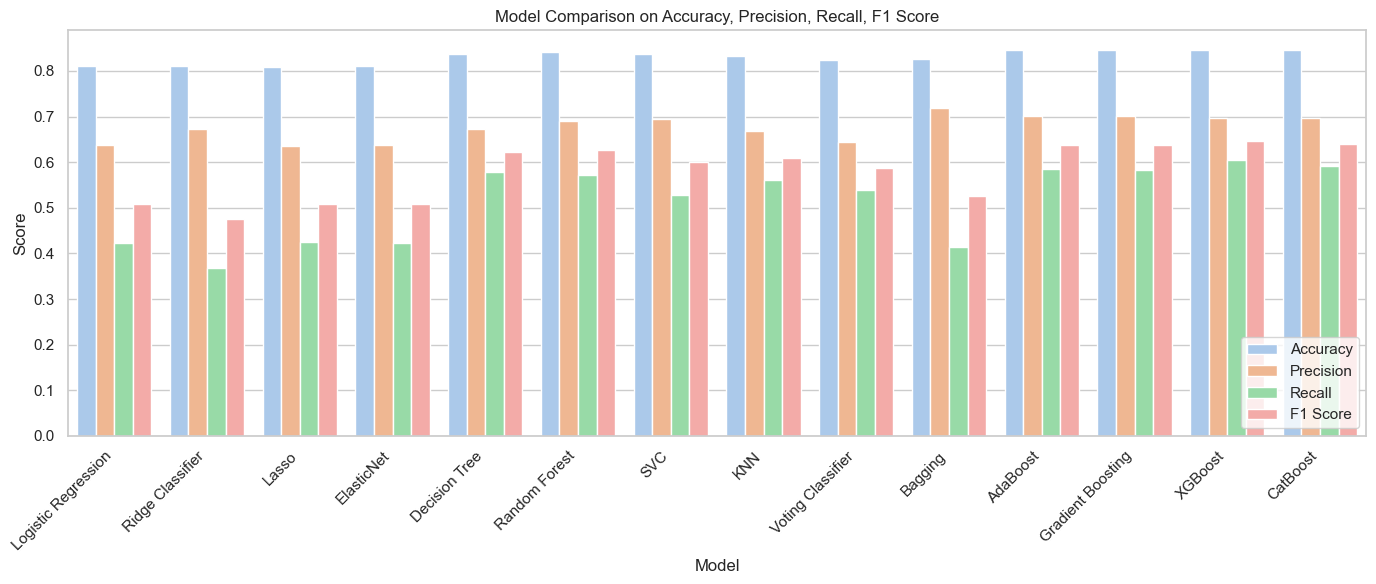

In [531]:
# Set plot style
sns.set(style='whitegrid', palette='pastel')
plt.figure(figsize=(14, 6))

# Melt the dataframe for easier plotting
melted_df = results_df.melt(id_vars='Model', 
                            value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                            var_name='Metric', value_name='Score')

# Create barplot
sns.barplot(data=melted_df, x='Model', y='Score', hue='Metric')
plt.xticks(rotation=45, ha='right')
plt.title('Model Comparison on Accuracy, Precision, Recall, F1 Score')
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()


# ROC AUC Plot (if available for your models)

In [532]:
# List of model names in the same order as your training calls
model_names = [
    "Logistic Regression",
    "Ridge Classifier",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "SVC",
    "KNN",
    "Voting Classifier",
    "Bagging",
    "AdaBoost",
    "Gradient Boosting",
    "XGBoost",
    "CatBoost"
]

# List of corresponding trained model objects
models = [
    logistic_regression,
    ridge_classifier,
    best_lasso_model,
    best_elastic_model,
    best_decision_tree_model,
    best_random_forest_model,
    best_svc_model,
    best_knn_model,
    voting_classifier,
    bagging_classifier,
    best_adaboost_model,
    best_gb_model,
    best_xgb_model,
    best_catboost_model
]


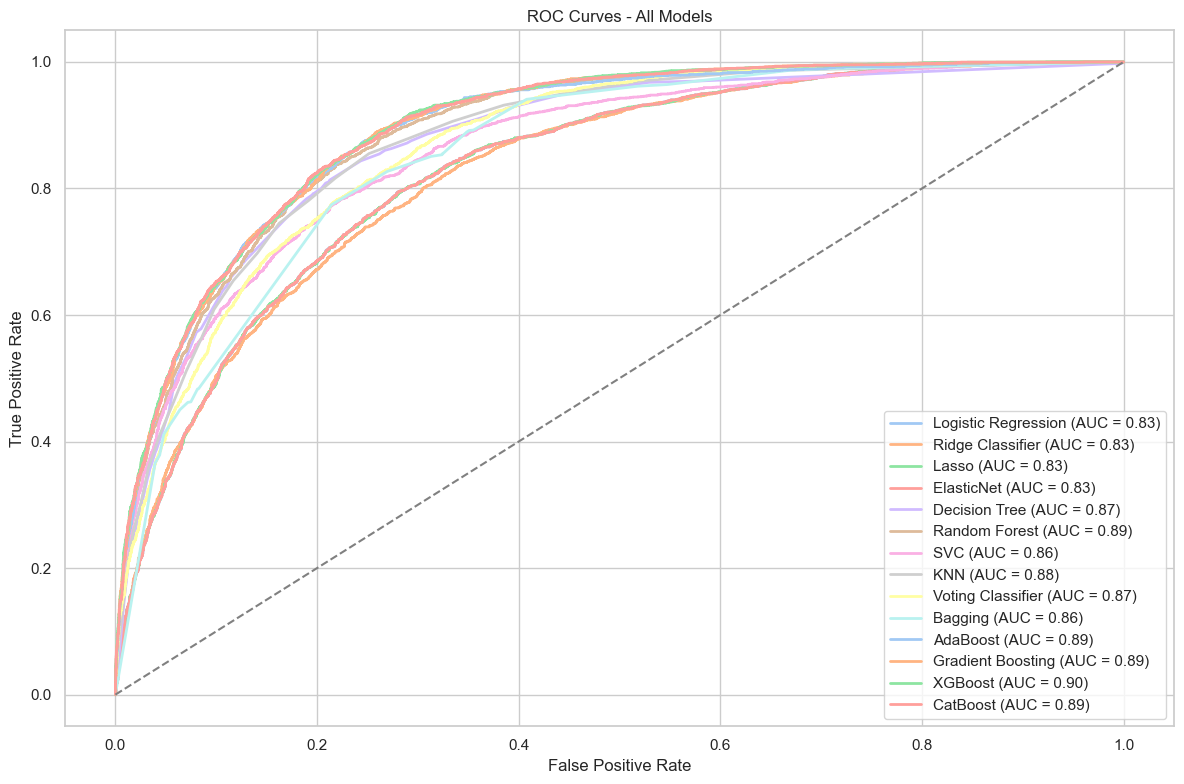

In [533]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(12, 8))

for name, model in zip(model_names, models):
    try:
        # Predict probabilities or decision function
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(x_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(x_test)
        else:
            print(f"Skipping {name}: no probability or decision output.")
            continue

        # Compute ROC and AUC
        fpr, tpr, _ = roc_curve(y_test, y_score)
        auc_score = roc_auc_score(y_test, y_score)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc_score:.2f})")

    except Exception as e:
        print(f"{name} skipped (error: {e})")

# Diagonal reference line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Plot styling
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [534]:
# Sort the results by Accuracy (descending) and get the top row
top_model = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]

# Print the best model and its metrics
print(f"\n🏆 Best Model: {top_model['Model']}")
print("\n📊 Performance Metrics:")
print(top_model)



🏆 Best Model: XGBoost

📊 Performance Metrics:
Model         XGBoost
Accuracy      0.84665
Precision     0.69585
Recall        0.60546
F1 Score     0.647516
Name: 12, dtype: object


# So we are getting best accuracy in XG Boost so we will go with XG Boost

### ⚙️ Creating a Machine Learning Pipeline for Classification

This pipeline includes both preprocessing (scaling and encoding) and the classification model (Support Vector Classifier). It ensures consistent data transformation and model training.

#### 📋 Step-by-Step Breakdown:

1. **Import Required Tools**:
   - `ColumnTransformer`: Applies different preprocessing to different column types.
   - `StandardScaler`: Standardizes numeric features.
   - `OneHotEncoder`: Encodes categorical features as binary vectors.
   - `Pipeline`: Chains preprocessing and modeling steps.

2. **Define Features**:
   - `numeric_features`: Columns with continuous numeric values.
   - `categorical_features`: Columns with categorical/text data.

3. **Create Preprocessor**:
   ```python
   preprocessor = ColumnTransformer([
       ('num', StandardScaler(), numeric_features),
       ('cat', OneHotEncoder(), categorical_features)
   ])


In [535]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import joblib

# Assuming your original raw dataset (before encoding or scaling)
# is still available as df_raw
df_raw = df_final.copy()  # Replace this with your actual raw DataFrame name

# Separate features and target
X = df_raw.drop('Income', axis=1)
y = df_raw['Income']

# Train-test split
x_train_raw, x_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Define numeric and categorical features
numeric_features = ['Age', 'Final_weight', 'Education-Num', 'Capital-Gain', 'Capital-Loss', 'Hours-Per-Week']
categorical_features = ['Workclass', 'Education', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-Country']

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(
        colsample_bytree = 1.0,
        gamma = 0.1, 
        learning_rate = 0.1, 
        max_depth = 5, 
        min_child_weight = 3, 
        n_estimators = 100, 
        reg_alpha = 1.0, 
        reg_lambda = 2.0, 
        subsample = 0.8
    ))
])

# Fit the pipeline to the training data
pipeline.fit(x_train_raw, y_train)

# Save the full pipeline
joblib.dump(pipeline, 'XGBClassifier_pipeline.pkl')


['XGBClassifier_pipeline.pkl']

In [540]:
import streamlit as st
import pandas as pd
import joblib

# Load the trained pipeline
pipeline = joblib.load("XGBClassifier_pipeline.pkl")

# Define UI
st.title("Income Category Prediction App")
st.write("Enter the required information to predict whether income is >50K or <=50K.")

# User Inputs
age = st.slider("Age", 17, 90, 30)
final_weight = st.number_input("Final Weight", min_value=1000, max_value=1000000, value=100000)
education_num = st.slider("Education Number", 1, 16, 10)
capital_gain = st.slider("Capital Gain", 0, 99999, 0)
capital_loss = st.slider("Capital Loss", 0, 4356, 0)
hours_per_week = st.slider("Hours per Week", 1, 99, 40)

# Categorical Inputs
workclass = st.selectbox("Workclass", [
    'Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov',
    'Without-pay', 'Never-worked'
])
education = st.selectbox("Education", [
    'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm',
    'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th',
    'Preschool', '12th'
])
marital_status = st.selectbox("Marital Status", [
    'Never-married', 'Married-civ-spouse', 'Divorced', 'Separated', 'Widowed', 'Married-AF-spouse'
])
occupation = st.selectbox("Occupation", [
    'Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty',
    'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing',
    'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'
])
relationship = st.selectbox("Relationship", [
    'Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'
])
race = st.selectbox("Race", [
    'White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'
])
sex = st.selectbox("Sex", ['Male', 'Female'])
native_country = st.selectbox("Native Country", [
    'United-States', 'India', 'Mexico', 'Philippines', 'Germany', 'Canada', 'England',
    'Cuba', 'Jamaica', 'South', 'China', 'Italy', 'Puerto-Rico', 'Honduras',
    'Japan', 'Vietnam', 'El-Salvador', 'Columbia', 'Poland', 'Iran'
])

# Create a DataFrame from user inputs
input_data = pd.DataFrame([{
    'Age': age,
    'Final_weight': final_weight,
    'Education-Num': education_num,
    'Capital-Gain': capital_gain,
    'Capital-Loss': capital_loss,
    'Hours-Per-Week': hours_per_week,
    'Workclass': workclass,
    'Education': education,
    'Marital-Status': marital_status,
    'Occupation': occupation,
    'Relationship': relationship,
    'Race': race,
    'Sex': sex,
    'Native-Country': native_country
}])

# Prediction
if st.button("Predict Income Category"):
    prediction = pipeline.predict(input_data)[0]
    prediction_proba = pipeline.predict_proba(input_data)[0]

    label = ">50K" if prediction == 1 else "<=50K"
    confidence = round(max(prediction_proba) * 100, 2)

    st.success(f"Predicted Income Category: {label}")
    st.info(f"Confidence: {confidence}%")


In [541]:
with open("app.py", "w", encoding="utf-8") as f:
    f.write("""
import streamlit as st
import pandas as pd
import joblib

# Load the trained pipeline
pipeline = joblib.load("XGBClassifier_pipeline.pkl")

# Define UI
st.title("Income Category Prediction App")
st.write("Enter the required information to predict whether income is >50K or <=50K.")

# User Inputs
age = st.slider("Age", 17, 90, 30)
final_weight = st.number_input("Final Weight", min_value=1000, max_value=1000000, value=100000)
education_num = st.slider("Education Number", 1, 16, 10)
capital_gain = st.slider("Capital Gain", 0, 99999, 0)
capital_loss = st.slider("Capital Loss", 0, 4356, 0)
hours_per_week = st.slider("Hours per Week", 1, 99, 40)

# Categorical Inputs
workclass = st.selectbox("Workclass", [
    'Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov',
    'Without-pay', 'Never-worked'
])
education = st.selectbox("Education", [
    'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm',
    'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th',
    'Preschool', '12th'
])
marital_status = st.selectbox("Marital Status", [
    'Never-married', 'Married-civ-spouse', 'Divorced', 'Separated', 'Widowed', 'Married-AF-spouse'
])
occupation = st.selectbox("Occupation", [
    'Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty',
    'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing',
    'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'
])
relationship = st.selectbox("Relationship", [
    'Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'
])
race = st.selectbox("Race", [
    'White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'
])
sex = st.selectbox("Sex", ['Male', 'Female'])
native_country = st.selectbox("Native Country", [
    'United-States', 'India', 'Mexico', 'Philippines', 'Germany', 'Canada', 'England',
    'Cuba', 'Jamaica', 'South', 'China', 'Italy', 'Puerto-Rico', 'Honduras',
    'Japan', 'Vietnam', 'El-Salvador', 'Columbia', 'Poland', 'Iran'
])

# Create a DataFrame from user inputs
input_data = pd.DataFrame([{
    'Age': age,
    'Final_weight': final_weight,
    'Education-Num': education_num,
    'Capital-Gain': capital_gain,
    'Capital-Loss': capital_loss,
    'Hours-Per-Week': hours_per_week,
    'Workclass': workclass,
    'Education': education,
    'Marital-Status': marital_status,
    'Occupation': occupation,
    'Relationship': relationship,
    'Race': race,
    'Sex': sex,
    'Native-Country': native_country
}])

# Prediction
if st.button("Predict Income Category"):
    prediction = pipeline.predict(input_data)[0]
    prediction_proba = pipeline.predict_proba(input_data)[0]

    label = ">50K" if prediction == 1 else "<=50K"
    confidence = round(max(prediction_proba) * 100, 2)

    st.success(f"Predicted Income Category: {label}")
    st.info(f"Confidence: {confidence}%")

""")


In [ ]:
Step 1 -> Type D:
Step 2 Then type -> cd "Data_science\Supervised Machine Learning\Assignment 2 Supervised Machine Learning\Income Classification"
Step 3 -> pip install xgboost in cmd
Step 4 -> streamlit run app.py